# Red Automotive Insurance **Customer Lifetime Value Prediction Model**

**JCDS 0406 011 - Muhamad Shidqi**

## Contents

1. **Business Problem Understanding**

    * Background Context

    * Problem Statement

    * Objective

    * Analytic Approach

2. **Data Understanding**

3. **Data Preprocessing**

4. **Modelling**

5. **Conclusion**

## Business Problem Understanding

**Background Context**

In the pursuit of customer-centric excellence, **Red Car Insurance Company** introduces a groundbreaking machine learning model for examine **Customer Lifetime Value (CLV)** of Red customers. This project strategically to facing issues in retaining customers and wants to advertise promotional offers for Red loyal customers.

Customer Lifetime Value (CLV) is an important metric in the car insurance industry that measures the net present value of a customer over their lifetime. CLV helps insurers to identify high-value customers and optimize the marketing strategies to retain them. Peter Drucker said “The purpose of a business is to create and keep a customer.” Which pretty much sums up the value of Customer Lifetime Value (CLV). CLV helps make important business decisions about strategies of sales, marketing, product development, and customer support.
* Marketing: How much should I spend to acquire a new customer?

* Product: How can I offer products and services tailored for my best customers?

* Customer Support: How much should I spend to service and retain a customer?

* Sales: What types of customers should sales reps spend the most time on trying to acquire?

Their practices to ensure long-term customer happiness and loyalty.

**Problems Statement**

It’s a competitive market for automotive insurance companies, and the insurance premium isn’t the only determining factor in a customer’s decisions. CLV is a powerful base to build upon to retain valuable customers, increase revenue from less valuable customers, and improve the customer experience overall. Using CLV effectively can improve customer acquisition and customer retention, prevent churn, help the company to plan its marketing budget, measure the performance of their campaign in more detail, and much more.

CLV obtained from the difference between the total amount of revenues from a customer and the total cost of servicing them. Red marketers should focus on tracking the customer lifetime value and acquisition costs of the customers by connecting their marketing data to their sales data. The higher CLV of customerts comes mostly through longer retention, and retention of customers is typically the most important factor in the industry. Therefore, Red should focus on retaining customers and making them more valuable to increase their profits.

Calculating customer lifetime value based on its history **takes quite a long time** (calculating the entire time the customer is with the company). By the time the calculation is completed, business strategies may be **too late to implement**, for example, in offering insurance renewals. A method is needed to predict customer lifetime value.

By predicting customer lifetime value, a company can determine which customers are likely to have high value and which are not. The company can focus its marketing activities on customers with high customer lifetime value, making marketing expenses more effective and efficient. Although the usefulness of the prediction will only be beneficial when the prediction is accurate.

**Objective**

Based on the problem statement above, Red need machine learning model to predict **customer lifetime value** of their customers. For this situation regression model can be implement to **predict the customer lifetime** value based on **sales and marketing data of Red customer**.

As a Data Scientist for Red, I gonna choose which regression model that most suits for I use as based of **Red CLV Machine Learning Model**.

**Analytic Approach**

1. First, I do Explantory Data Analysis (EDA) on Red Data Sales. 
2. Then, I do Data Preprocessing on the dataset so it become suitable and can be processed by the model.
3. Next, I do Feature Engineering on the feature if needed.
4. After that, I do model benchmarking from some of existed powerful regression model and choose the best fit model for our dataset.
5. Last, I do some residual analysis to determine how well the model captures the underlying patterns in the data. Because I use linear regression, the residuals should be normally distributed with a mean of zero and constant variance across the range of predicted values. This help us to ensure that the model's performance is consistent across different subsets of the data and that the model is robust enough to generalize well to unseen data.

**Metric Evaluation**

Type here

In [1]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.base import BaseEstimator
class DummyEstimator(BaseEstimator):
    def fit(self): pass
    def score(self): pass

#Data Processing Library
import numpy as np
import pandas as pd
from ydata_profiling import ProfileReport

#Data Visualization Library
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

#Data Preprocessing Library
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler, RobustScaler
from sklearn.compose import ColumnTransformer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.pipeline import Pipeline

#Data Modeling Library
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error, mean_squared_log_error
from sklearn.model_selection import GridSearchCV, KFold

## Data Understanding

* Type here

**Attributes Information**

**No**  |       **Feature**       |                   **Description**                  |    **Data Type**   |
:------:|:-----------------------:|:--------------------------------------------------:|:------------------:|
1       | Vehicle Class           | Type of customer vehicle.                          |Object              |
2       | Coverage                | Protection package for customer vehicle.           |Object              |
3       | Renew Offer Type        | Offer that customer take to extend the protection. |Object              |
4       | Employment Status       | Customer current job status.                       |Object              |
5       | Marital Status          | Marital status of customer.                        |Object              |
6       | Education               | Education degree of customer.                      |Object              |
7       | Number of Policies      | Insurance policies that customer already have.     |Float               |
8       | Monthly Premium Auto    | Insurance premium rate of customer.                |Float               |
9       | Total Claim Amount      | Customer total claim to company.                   |Float               |
10      | Income                  | Income value of customer.                          |Float               |
11      | Customer Lifetime Value | The CLV value of customer.                         |Float               |

* From attributes information above I can see there is 11 columns in our dataset. **Customer Lifetime Value** column will I use as dependent variable (target) of our model. While, another 10 columns will gonna use as independent variables (features) of our model.

* There are 7 category columns and 4 numeric columns.

Now let's do EDA to our dataset.

In [2]:
#Import Dataset
source = pd.read_csv('data_customer_lifetime_value.csv')
source.head()

Vehicle Class  Coverage Renew Offer Type EmploymentStatus Marital Status  \
0  Four-Door Car  Extended           Offer1          Retired       Divorced   
1  Four-Door Car     Basic           Offer1         Employed        Married   
2   Two-Door Car     Basic           Offer1          Retired        Married   
3  Four-Door Car   Premium           Offer3         Disabled        Married   
4   Two-Door Car     Basic           Offer3    Medical Leave        Married   

              Education  Number of Policies  Monthly Premium Auto  \
0  High School or Below                 2.0                  90.0   
1               College                 6.0                  62.0   
2                Master                 2.0                  62.0   
3  High School or Below                 1.0                 116.0   
4  High School or Below                 1.0                  62.0   

   Total Claim Amount   Income  Customer Lifetime Value  
0          571.479602  11828.0             10083.486880  
1          114.514440  44762.0              4943.386117  
2          257.248789  21514.0             11981.984810  
3          556.800000  17913.0              4550.856045  
4          355.820799  19030.0              2372.155492

## Explorative Data Analysis (EDA)

In [3]:
#Overview with Profile Report
# display(ProfileReport(source))

In [4]:
display(source.info(), source.describe(), source.describe(include='object'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5669 entries, 0 to 5668
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Vehicle Class            5669 non-null   object 
 1   Coverage                 5669 non-null   object 
 2   Renew Offer Type         5669 non-null   object 
 3   EmploymentStatus         5669 non-null   object 
 4   Marital Status           5669 non-null   object 
 5   Education                5669 non-null   object 
 6   Number of Policies       5669 non-null   float64
 7   Monthly Premium Auto     5669 non-null   float64
 8   Total Claim Amount       5669 non-null   float64
 9   Income                   5669 non-null   float64
 10  Customer Lifetime Value  5669 non-null   float64
dtypes: float64(5), object(6)
memory usage: 487.3+ KB


None

Number of Policies  Monthly Premium Auto  Total Claim Amount  \
count         5669.000000           5669.000000         5669.000000   
mean             2.979361             93.026989          431.407103   
std              2.393187             34.551795          287.558038   
min              1.000000             61.000000            0.423310   
25%              1.000000             68.000000          266.932542   
50%              2.000000             82.000000          379.200000   
75%              4.000000            109.000000          549.986128   
max              9.000000            297.000000         2759.794354   

             Income  Customer Lifetime Value  
count   5669.000000              5669.000000  
mean   37868.188569              8029.874592  
std    30490.490723              6916.708246  
min        0.000000              1898.007675  
25%        0.000000              3954.344534  
50%    34322.000000              5800.188903  
75%    62464.000000              9031.214859  
max    99934.000000             83325.381190

Vehicle Class Coverage Renew Offer Type EmploymentStatus  \
count            5669     5669             5669             5669   
unique              6        3                4                5   
top     Four-Door Car    Basic           Offer1         Employed   
freq             2858     3477             2292             3541   

       Marital Status Education  
count            5669      5669  
unique              3         5  
top           Married  Bachelor  
freq             3305      1703

### Invalid Data

* From Profile Report we know there is 1,429 (25.9%) "0" value in income column.

In [5]:
sample = source[source['Income'] == 0]
display(sample.describe(), sample.describe(include='object'))

Number of Policies  Monthly Premium Auto  Total Claim Amount  Income  \
count         1429.000000           1429.000000         1429.000000  1429.0   
mean             3.057383             93.687894          595.598378     0.0   
std              2.411355             32.849231          323.439890     0.0   
min              1.000000             61.000000            2.704934     0.0   
25%              1.000000             69.000000          376.923839     0.0   
50%              2.000000             84.000000          525.600000     0.0   
75%              4.000000            110.000000          725.870693     0.0   
max              9.000000            290.000000         2759.794354     0.0   

       Customer Lifetime Value  
count              1429.000000  
mean               7684.433265  
std                6437.745039  
min                1898.007675  
25%                3788.814643  
50%                5714.246379  
75%                8662.048958  
max               64618.757150

Vehicle Class Coverage Renew Offer Type EmploymentStatus  \
count            1429     1429             1429             1429   
unique              6        3                4                1   
top     Four-Door Car    Basic           Offer1       Unemployed   
freq              712      853              752             1429   

       Marital Status             Education  
count            1429                  1429  
unique              3                     5  
top            Single  High School or Below  
freq              811                   486

* When I check further the data, the zero income all come from Unemployed in the Employment Status. But the value of the other columns seems distribute normally and didn't have missing value. Even the value of CLV from all the zero data have positive and big variance. Actually this indicate fraud, based domain knowledge this fraud commonly happen when the vehicle information isn't directly under the real owner names.

* I gonne retain this data from our dataset because this usually do by the customer as tax avoidance.

In [72]:
categorycal_feature = ['Vehicle Class', 'Coverage', 'Renew Offer Type', 'Employment Status', 'Marital Status', 'Education']
numerical_feature = ['Number of Policies', 'Monthly Premium Auto', 'Total Claim Amount', 'Income']

#### Vehicle Class

In [8]:
# #Seaborn Chart of Vehicle Class
# plt.figure(figsize=(8,8))
# sns.countplot(x='Vehicle Class', data=source, palette='Set2')
# plt.title('Vehicle Class')
# plt.show()

Visualization below is the same visualization from Vehicle Class Column with Plotly Library

In [9]:
#Vehicle Class
#Plotly Pie Chart of Vehicle Class
vehicle_class_counts = source['Vehicle Class'].value_counts()

# Convert the Series to DataFrame for Plotly
df_vehicle_class_counts = vehicle_class_counts.reset_index()
df_vehicle_class_counts.columns = ['Vehicle Class', 'Count']

# Create a bar chart
vc_fig = px.pie(df_vehicle_class_counts, names='Vehicle Class', values='Count', color='Vehicle Class',
             title='Vehicle Class',
             labels=df_vehicle_class_counts.columns)

vc_fig.show()

* 50% vehicle who insured is Four-Door Car, make Four-Door car the most vehicle insured insured in red. Follow by SUV and Two-Door Car, around 20% of the total vehicle insured car.

#### Coverage

In [10]:
# #Seaborn Chart of Coverage
# plt.figure(figsize=(8,8))
# sns.countplot(x='Coverage', data=source, palette='Set2')
# plt.title('Coverage')
# plt.show()

Visualizaton below is the same visualization from Coverage Column with Plotly Library

In [11]:
#Coverage
coverage_counts = source['Coverage'].value_counts()

# Convert the Series to DataFrame for Plotly
df_coverage_counts = coverage_counts.reset_index()
df_coverage_counts.columns = ['Coverage', 'Count']

# Create a bar chart
coverage_fig = px.pie(df_coverage_counts, names='Coverage', values='Count', color='Coverage',
             title='Coverage',
             labels=df_coverage_counts.columns)
coverage_fig.show()

* The most loved product from Red Autoinsurance are the basic one, with more than half red customers have it. The less unfavorite product are the premium one, usually customers choose Premium coverage for their luxury car but the luxury car are less insured in Red. 

#### Renew Offer Type

In [12]:
# #Seaborn Chart of Renew Offer Type
# plt.figure(figsize=(8,8))
# sns.countplot(x='Renew Offer Type', data=source, palette='Set2')
# plt.title('Renew Offer Type')
# plt.show()

Visualizaton below is the same visualization from Renew Offer Type Column with Plotly Library

In [13]:
#Renew Offer Type
renew_offer_type_counts = source['Renew Offer Type'].value_counts()

# Convert the Series to DataFrame for Plotly
df_renew_offer_type_counts = renew_offer_type_counts.reset_index()
df_renew_offer_type_counts.columns = ['Renew Offer Type', 'Count']

# Create a bar chart
renew_offer_type_fig = px.pie(df_renew_offer_type_counts, names='Renew Offer Type', values='Count', color='Renew Offer Type',
             title='Renew Offer Type',
             labels=df_renew_offer_type_counts.columns)
renew_offer_type_fig.show()

Red offer some renew packages to their customers for extend the policies. The most interesting package for customers is the Package 1 and follow by Package 2.

#### Employment Status

In [3]:
source.rename(columns={'EmploymentStatus': 'Employment Status'}, inplace=True)

In [15]:
# #Seaborn Chart of Employment Status
# plt.figure(figsize=(8,8))
# sns.countplot(x='Employment Status', data=source, palette='Set2')
# plt.title('Employment Status')
# plt.show()

Visualizaton below is the same visualization from Employment Status Column with Plotly Library

In [4]:
#Employment Status
employment_status_counts = source['Employment Status'].value_counts()

# Convert the Series to DataFrame for Plotly
df_employment_status_counts = employment_status_counts.reset_index()
df_employment_status_counts.columns = ['Employment Status', 'Count']

# Create a bar chart
employment_status_fig = px.pie(df_employment_status_counts, names='Employment Status', values='Count', color='Employment Status',
             title='Employment Status',
             labels=df_employment_status_counts.columns)
employment_status_fig.show()

* Despite a significant portion being employed 62.5%, there is also notable representation from other employment categories such as unemployed 25.2%. This diversity suggests that insurance policies cater to a wide spectrum of individuals, including those in various stages of employment and life situations.

#### Marital Status

In [17]:
# #Seaborn Chart of Marital Status
# plt.figure(figsize=(8,8))
# sns.countplot(x='Marital Status', data=source, palette='Set2')
# plt.title('Marital Status')
# plt.show()

Visualizaton below is the same visualization from Marital Status Column with Plotly Library

In [18]:
#Marital Status
marital_status_counts = source['Marital Status'].value_counts()

# Convert the Series to DataFrame for Plotly
df_marital_status_counts = marital_status_counts.reset_index()
df_marital_status_counts.columns = ['Marital Status', 'Count']

# Create a bar chart
marital_status_fig = px.pie(df_marital_status_counts, names='Marital Status', values='Count', color='Marital Status',
             title='Marital Status',
             labels=df_marital_status_counts.columns)
marital_status_fig.show()

Type here

#### Education

In [19]:
#Seaborn Chart of Education
# plt.figure(figsize=(8,8))
# sns.countplot(x='Education', data=source, palette='Set2')
# plt.title('Education')
# plt.show()

Visualizaton below is the same visualization from Education Column with Plotly Library

In [20]:
#Education
education_counts = source['Education'].value_counts()

# Convert the Series to DataFrame for Plotly
df_education_counts = education_counts.reset_index()
df_education_counts.columns = ['Education', 'Count']

# Create a bar chart
education_fig = px.pie(df_education_counts, names='Education', values='Count', color='Education',
             title='Education',
             labels=df_education_counts.columns)
education_fig.show()

Type here

## Data Preproessing

#### Global Outlier

In [21]:
# #Seaborn Boxplot of Numberical Feature
# for i in numerical_feature:
#     plt.figure(figsize=(8,8))
#     sns.boxplot(x=i, data=source, palette='Set2')
#     plt.title(i)
#     plt.show()

Visualizaton below is the same visualization of Boxplot from Numerical Feature with Plotly Library

In [22]:
# Create subplots: 2 rows, 2 columns
boxplot = make_subplots(rows=2, cols=2)

# Add box plots
for i, col in enumerate(numerical_feature, start=1):
    boxplot.add_trace(
        go.Box(y=source[col], name=col),
        row=(i-1)//2+1,
        col=(i-1)%2+1
    )
boxplot.update_layout(height=900, width=1200)
boxplot.show()

In [23]:
# #Seaborn of CLV Historgram
# plt.figure(figsize=(8,8))
# sns.histplot(x='Customer Lifetime Value', data=source, palette='Set2')
# plt.title('Customer Lifetime Value')
# plt.show()

Visualizaton below is the same visualization of histogram from Customer Lifetime Value Column with Plotly Library

In [24]:
#Customer Lifetime Value Histogram
clv_hist = px.histogram(source, x="Customer Lifetime Value", marginal="box", hover_data=source.columns, title="Customer Lifetime Value")
clv_hist.show()

#### Contextual Outlier

In [25]:
#Make Seaborn Scatterplot Matrix between CLV and Numerical Feature
# sns.pairplot(source, x_vars=numerical_feature, y_vars='Customer Lifetime Value', palette='Set2')
# plt.show()

Visualizaton below is the same visualization of Scatterplot Matrix between Customer Lifetime Value and Numerical Feature with Plotly Library

In [26]:
from itertools import cycle

# Define a cycle of colors
color_cycle = cycle(go.Figure().layout.template.layout.colorway)
color_dict = {'Sports Car': 'red', 'Four-Door Car': 'blue', 'SUV': 'green', 'Two-Door Car': 'yellow', 'Luxury Car': 'black', 'Luxury SUV': 'orange'}

# Make temporary dataframe
df = source.copy()
df['Color'] = df['Vehicle Class'].map(color_dict)

#Make Scatterplot Matrix between numerical features and Customer Lifetime Value
for feature in numerical_feature:
    fig = go.Figure()
    for vehicle_class, color in color_dict.items():
        df_class = df[df['Vehicle Class'] == vehicle_class]
        fig.add_trace(go.Scatter(x=df_class[feature], y=df_class['Customer Lifetime Value'], mode='markers', marker_color=color, name=vehicle_class))
    fig.update_layout(title=f"Scatter plot of Customer Lifetime Value and {feature}", xaxis_title=feature, yaxis_title='Customer Lifetime Value')
    fig.show()

In [27]:
#Make Seaborn Scatterplot Matrix between CLV and Categorical Feature
# for feature in categorycal_feature:
#     plt.figure(figsize=(8,8))
#     sns.boxplot(x=feature, y='Customer Lifetime Value', data=source, palette='Set2')
#     plt.title(f"Customer Lifetime Value and {feature}")

Visualizaton below is the same visualization between CLV and Categorical Features with Plotly Library

In [28]:
#Make Scatterplot Matrix between categorical features and Customer Lifetime Value
for feature in categorycal_feature:
    fig = go.Figure()
    for vehicle_class, color in color_dict.items():
        df_class = df[df['Vehicle Class'] == vehicle_class]
        fig.add_trace(go.Scatter(x=df_class[feature], y=df_class['Customer Lifetime Value'], mode='markers', marker_color=color, name=vehicle_class))
    fig.update_layout(title=f"Scatter plot of Customer Lifetime Value and {feature}", xaxis_title=feature, yaxis_title='Customer Lifetime Value')
    fig.show()

In [29]:
# #Make Seaborn Scatterplot Matrix between Income, Monthly Premium Auto, and Number of Policies with Total Claim Amount
# for feature in ['Income', 'Monthly Premium Auto', 'Number of Policies']:
#     plt.figure(figsize=(8,8))
#     sns.scatterplot(x=feature, y='Total Claim Amount', data=source, palette='Set2')
#     plt.title(f"Total Claim Amount and {feature}")
#     plt.show()

Visualization below is the same visualization of scatterplot matrix between Income, Monthly Premium Auto, and Number of Policies with Plotly Library

In [30]:
#Make Scatterplot Matrix between Income, Monthly Premium Auto, and Number of Policies with Total Claim Amount

#Define X Axis
choosen_matrix = ['Income', 'Monthly Premium Auto', 'Number of Policies']

#Make Scatterplot Matrix
for feature in choosen_matrix:
    hover_text = [f"{feature}: {f_val}<br>Total Claim Amount: {tca_val}<br>Customer Lifetime Value: {clv_val}" 
                  for f_val, tca_val, clv_val in zip(df[feature], df['Total Claim Amount'], df['Customer Lifetime Value'])]
    fig = go.Figure(data=go.Scatter(x=df[feature], y=df['Total Claim Amount'], mode='markers', marker_color=df['Color'], hovertext=hover_text, hoverinfo='text'))
    fig.update_layout(title=f"Scatter plot of Total Claim Amount and {feature}", xaxis_title=feature, yaxis_title='Total Claim Amount')
    fig.show()

* We can see the outlier are come from Luxury Car and Luxury SUV, the proportion of Luxury SUV and the Luxury Car are so small just 4% in aggregate. That is our **Model Limitation**, the model can't effectively predict the Customer Lifetime Value from Luxury Vehicle because the data of Luxury Vehicle are so limited in this dataset. This happen because the primary segment of Red are Non-Luxury Vehicle.

In [5]:
#Drop the outliers
source = source[~source['Vehicle Class'].isin(['Luxury Car', 'Luxury SUV'])]
print(f'Total data after we drop the outliers {len(source)} data.')

Total data after we drop the outliers 5447 data.


Double Check Outlier After Handling

In [32]:
#Slicing the Numeric Column
numeric = source.select_dtypes(include=np.number).columns.tolist()

# #Create Seaborn Subplots: 3 rows, 2 columns
# sea_box, ax = plt.subplots(3, 2, figsize=(20, 20))

# #Create Seaborn Color Palette
# palette = sns.color_palette('hls', len(numeric))

# #Make Seaborn Boxplot of Numeric Column
# for variable, subplot, color in zip(numeric, ax.flatten(), palette):
#     sns.boxplot(source[variable], ax=subplot, color=color)
#     subplot.set_title(variable, fontsize=20)
#     for label in subplot.get_xticklabels():
#         label.set_rotation(90)

# #Remove the blank subplot
# sea_box.delaxes(ax[2,1])

Visualizaton below is the same visualization the boxplot of numeric coloumns with Plotly Library

In [33]:
# Create subplots: 3 rows, 2 columns
boxplot = make_subplots(rows=3, cols=2)

# Add box plots
for i, col in enumerate(numeric, start=1):
    boxplot.add_trace(
        go.Box(y=source[col], name=col),
        row=(i-1)//2+1,
        col=(i-1)%2+1 if i <= 4 else 2
    )
boxplot.update_layout(height=1200, width=1200)
boxplot.show()

In [34]:
#Seaborn of CLV Historgram
# plt.figure(figsize=(8,8))
# sns.histplot(x='Customer Lifetime Value', data=source, palette='Set2')
# plt.title('Customer Lifetime Value')
# plt.show()

Visualizaton below is the same visualization of Histrogram Customer Lifetime Value with Plotly Library

In [35]:
#Customer Lifetime Value Histogram
clv_hist = px.histogram(source, x="Customer Lifetime Value", marginal="box", hover_data=source.columns, title="Customer Lifetime Value")
clv_hist.show()

* There is global outlier in Number of Policies column. But the variance of the global outlier from upper fence is just 1 point. We will try to see further the data point.

* After that, there is still global outlier in Total Claim Amount. We are gonne drop this one.

* Also there are some global outliers in our Target Variable. We also gonna try to drop the global outlier.

In [36]:
sample = source[source['Number of Policies'] > 8]
display(sample.describe(), sample.describe(include='object'))

Number of Policies  Monthly Premium Auto  Total Claim Amount  \
count               189.0            189.000000          189.000000   
mean                  9.0             86.682540          340.902382   
std                   0.0             23.170845          192.284001   
min                   9.0             61.000000            2.540090   
25%                   9.0             68.000000          192.879457   
50%                   9.0             78.000000          331.200000   
75%                   9.0            107.000000          467.803638   
max                   9.0            193.000000         1224.563450   

             Income  Customer Lifetime Value  
count    189.000000               189.000000  
mean   50079.439153              6815.360928  
std    24410.105208              1839.799010  
min    12677.000000              4605.036646  
25%    28280.000000              5380.898636  
50%    45732.000000              6057.072080  
75%    67798.000000              8456.455313  
max    99359.000000             15306.224930

Vehicle Class Coverage Renew Offer Type Employment Status  \
count             189      189              189               189   
unique              4        3                4                 4   
top     Four-Door Car    Basic           Offer1          Employed   
freq              108      125               89               158   

       Marital Status Education  
count             189       189  
unique              3         5  
top           Married  Bachelor  
freq              131        65

* After we look further the data of Number of Policies outlier, the data are considered reasonable. Even, the Total Claim Amount Value and Customer Lifetime Value of this data doesn't belonging the global outliers from those two. This can be happen because it can be the customer who had 9 policies are organization such as company or government institutions. We gonna retain the data point with "9" for the number of policies to maintain data integrity, gain insights into customer behavior, and ensure a robust analysis of the dataset.

In [7]:
#Drop Total Claim Amount Global Outliers
source.drop(source[source['Total Claim Amount'] > 1300].index, inplace=True)

#Drop Customer Lifetime Value Global Outliers
source.drop(source[source['Customer Lifetime Value'] > 43500].index, inplace=True)

print(f'Total data after we drop the outliers {len(source)} data.')

Total data after we drop the outliers 4061 data.


### Duplicated Data

In [8]:
#Check Duplicate Data
print(f'Total duplicate data {source.duplicated().sum()} data.')

Total duplicate data 501 data.


In [9]:
#Drop Duplicate Data and Keep the First Data
source.drop_duplicates(inplace=True)
source.reset_index(drop=True, inplace=True)
print(f'Total data after we drop the duplicate data {len(source)} data.')

Total data after we drop the duplicate data 4849 data.


### Multicolinearity Check

* Multicollinearity occurs when two or more predictor variables in a regression model are highly correlated with each other. This can cause issues in the model because it becomes difficult to separate out the individual effects of each predictor variable on the target variable.

* Variable Inflation Factor (VIF) is a measure that quantifies the severity of multicollinearity in a regression analysis. It calculates how much the variance of an estimated regression coefficient is inflated due to multicollinearity in the model.

* If the VIF for a particular variable is high, it suggests that the variable is highly correlated with other predictor variables in the model, making it difficult to interpret its individual effect on the target variable.

In [10]:
#Check VIF on Numerical Features
X_vif = source[numerical_feature]
vif = pd.DataFrame()
vif['Features'] = X_vif.columns
vif['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(len(X_vif.columns))]
vif.sort_values(by='VIF', ascending=False)

Features        VIF
1  Monthly Premium Auto  10.937956
2    Total Claim Amount   6.263143
3                Income   2.803143
0    Number of Policies   2.338641

We can see the Monthly Premium Auto feature has the highest VIF value indicates that it is strongly correlated with one or more of the other numerical features.

In [41]:
corr = source.corr(method='spearman')

#Seaborn Heatmap of Correlation
# plt.figure(figsize=(10,10))
# sns.heatmap(corr, annot=True, cmap='coolwarm')
# plt.title('Correlation')
# plt.show()

Visualizaton below is the same visualization of Heatmap Correlation with Plotly Library

In [42]:
#Heatmap of Correlation with Plotly
fig = go.Figure(data=go.Heatmap(
                   z=corr,
                   x=corr.columns,
                   y=corr.columns,
                   hoverongaps = False,
                   colorscale='Viridis',
                   text = np.around(corr.values, decimals=2),
                   hoverinfo='text'))
# Add annotations for correlation values
annotations = []
for i, row in enumerate(corr.values):
    for j, value in enumerate(row):
        annotations.append(go.layout.Annotation(
            x=corr.columns[j], y=corr.columns[i], text=str(round(value, 2)), showarrow=False, font=dict(color='red' if abs(value) > 0.5 else 'white')))

fig.update_layout(title='Correlation Heatmap', annotations=annotations)
fig.show()

In [11]:
numerical_feature = ['Number of Policies', 'Total Claim Amount', 'Income']
#Check again VIF on Numerical Features
X_vif = source[numerical_feature]
vif = pd.DataFrame()
vif['Features'] = X_vif.columns
vif['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(len(X_vif.columns))]
vif.sort_values(by='VIF', ascending=False)

Features       VIF
0  Number of Policies  2.139584
1  Total Claim Amount  1.898403
2              Income  1.639139

**Category Features Encoding & Numerical Features Scaler**

Encoding categorical features is an essential step in preparing data for machine learning models, including regression models.

* Machine learning algorithms typically work with numerical data. Categorical variables, such as Vehicle Class, Coverage, Renew Offer Type, Employment Status, Marital Status, and Education, are non-numeric in nature. Encoding these categorical variables into numerical representations allows machine learning algorithms to process and learn from them.

Scaler

* Type here

In [44]:
cat = []
for i in categorycal_feature:
    cat.append([i, source[i].nunique(), source[i].unique()])
cat = pd.DataFrame(cat, columns=['Feature', 'Unique', 'Value'])
pd.set_option('display.max_colwidth', None)
cat

Feature  Unique  \
0      Vehicle Class       4   
1           Coverage       3   
2   Renew Offer Type       4   
3  Employment Status       4   
4     Marital Status       3   
5          Education       5   

                                                       Value  
0             [Four-Door Car, Two-Door Car, SUV, Sports Car]  
1                                 [Extended, Basic, Premium]  
2                           [Offer1, Offer3, Offer2, Offer4]  
3               [Retired, Employed, Disabled, Medical Leave]  
4                                [Divorced, Married, Single]  
5  [High School or Below, College, Master, Bachelor, Doctor]

In [12]:
#Define Mapping for Ordinal Encoding
coverage_mapping = {None: 0, 'Basic': 1, 'Extended': 2, 'Premium': 3}
education_mapping = {None: 0, 'High School or Below': 1, 'College': 2, 'Bachelor': 3, 'Master': 4, 'Doctor': 5}

#Define Ordinal Encoder
ordinal_encoder_alpha = ce.OrdinalEncoder(mapping=[{'col': 'Coverage', 'mapping': coverage_mapping},
                                             {'col': 'Education', 'mapping': education_mapping}])

ordinal_encoder_beta = ce.OrdinalEncoder(mapping=[{'col': 'Education', 'mapping': education_mapping}])

#Define Transformer
optimus_prime = ColumnTransformer([
    ('Optimus Prime OneHot', OneHotEncoder(drop='first'), ['Vehicle Class', 'Renew Offer Type', 'Employment Status', 'Marital Status']),
    ('Optimus Prime Ordinal', ordinal_encoder_alpha, ['Coverage', 'Education']),
    ('Optimus Prime MinMaX', MinMaxScaler(), ['Income']),
    ('Optimus Prime Robust', RobustScaler(), ['Number of Policies', 'Total Claim Amount'])
])
bumblebee = ColumnTransformer([
    ('Bumblebee OneHot', OneHotEncoder(drop='first'), ['Vehicle Class', 'Renew Offer Type', 'Employment Status', 'Marital Status']),
    ('Bumblebee Ordinal', ordinal_encoder_alpha, ['Coverage', 'Education']),
    ('Bumblebee Standard', StandardScaler(), ['Income']),
    ('Bumblebee Robust', RobustScaler(), ['Number of Policies', 'Total Claim Amount'])
])
ratchet = ColumnTransformer([
    ('Ratchet OneHot', OneHotEncoder(drop='first'), ['Vehicle Class', 'Renew Offer Type', 'Employment Status', 'Marital Status']),
    ('Ratchet Ordinal', ordinal_encoder_alpha, ['Coverage', 'Education']),
    ('Ratchet MinMax', MinMaxScaler(), ['Income', 'Number of Policies']),
    ('Ratchet Robust', RobustScaler(), ['Monthly Premium Auto', 'Total Claim Amount'])
])
ironhide = ColumnTransformer([
    ('Ironhide OneHot', OneHotEncoder(drop='first'), ['Vehicle Class', 'Renew Offer Type', 'Employment Status', 'Marital Status']),
    ('Ironhide Ordinal', ordinal_encoder_alpha, ['Coverage', 'Education']),
    ('Ironhide Standard', StandardScaler(), ['Income', 'Number of Policies']),
    ('Ironhide Robust', RobustScaler(), ['Total Claim Amount'])
])
jazz = ColumnTransformer([
    ('Jazz OneHot', OneHotEncoder(drop='first'), ['Vehicle Class', 'Renew Offer Type', 'Employment Status', 'Marital Status']),
    ('Jazz Ordinal', ordinal_encoder_alpha, ['Coverage', 'Education']),
    ('Jazz MinMax', MinMaxScaler(), ['Income']),
    ('Jazz Standard', StandardScaler(), ['Number of Policies']),
    ('Jazz Robust', RobustScaler(), ['Total Claim Amount'])
])
megatron = ColumnTransformer([
    ('Megatron OneHot', OneHotEncoder(drop='first'), ['Vehicle Class', 'Coverage', 'Renew Offer Type', 'Employment Status', 'Marital Status']),
    ('Megatron Ordinal', ordinal_encoder_beta, ['Education']),
    ('Megatron MinMax', MinMaxScaler(), ['Income']),
    ('Megatron Robust', RobustScaler(), ['Number of Policies', 'Total Claim Amount'])
])
sentinel_prime = ColumnTransformer([
    ('Sentinel Prime OneHot', OneHotEncoder(drop='first'), ['Vehicle Class', 'Coverage', 'Renew Offer Type', 'Employment Status', 'Marital Status']),
    ('Sentinel Prime Ordinal', ordinal_encoder_beta, ['Education']),
    ('Sentinel Prime Standard', StandardScaler(), ['Income']),
    ('Sentinel Prime Robust', RobustScaler(), ['Total Claim Amount'])
])
sideswipe = ColumnTransformer([
    ('Sideswipe OneHot', OneHotEncoder(drop='first'), ['Vehicle Class', 'Coverage', 'Renew Offer Type', 'Employment Status', 'Marital Status']),
    ('Sideswipe Ordinal', ordinal_encoder_beta, ['Education']),
    ('Sideswipe MinMax', MinMaxScaler(), ['Income', 'Number of Policies']),
    ('Sideswipe Robust', RobustScaler(), ['Total Claim Amount'])
])
skids = ColumnTransformer([
    ('Skids OneHot', OneHotEncoder(drop='first'), ['Vehicle Class', 'Coverage', 'Renew Offer Type', 'Employment Status', 'Marital Status']),
    ('Skids Ordinal', ordinal_encoder_beta, ['Education']),
    ('Skids Standard', StandardScaler(), ['Income', 'Number of Policies']),
    ('Skids Robust', RobustScaler(), ['Total Claim Amount'])
])
mudflap = ColumnTransformer([
    ('Mudflap OneHot', OneHotEncoder(drop='first'), ['Vehicle Class', 'Coverage', 'Renew Offer Type', 'Employment Status', 'Marital Status']),
    ('Mudflap Ordinal', ordinal_encoder_beta, ['Education']),
    ('Mudflap MinMax', MinMaxScaler(), ['Income']),
    ('Mudflap Standard', StandardScaler(), ['Number of Policies']),
    ('Mudflap Robust', RobustScaler(), ['Total Claim Amount'])
])

#Make List of Transformer
transformer = [optimus_prime, bumblebee, ratchet, ironhide, jazz, megatron, sentinel_prime, sideswipe, skids, mudflap]

In [13]:
#Define X and Y
X = source.drop(['Customer Lifetime Value', 'Monthly Premium Auto'], axis=1)
Y = source['Customer Lifetime Value']

## Machine Learning Modelling

Type here

In [14]:
#Splitting Dataset
X_train_val, X_test, Y_train_val, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2020)

#Define Base Model

#Linear Regression
base_linreg = LinearRegression()

#Ridge
base_ridge = Ridge()

#Lasso
base_lasso = Lasso()

#KNN Regressor
base_knn = KNeighborsRegressor()

#Decision Tree Regressor
base_dt = DecisionTreeRegressor(random_state=2020)

#Random Forest Regressor
base_rf = RandomForestRegressor(random_state=2020)

#XGBoost Regressor
base_xgb = XGBRegressor(random_state=2020)

#LightGBM Regressor
base_lgbm = LGBMRegressor(random_state=2020)

#Gradient Boosting Regressor
base_gb = GradientBoostingRegressor(random_state=2020)

#SVR
base_svr = SVR()

#Define Cross Validation & Scoring
cv = KFold(n_splits=10, shuffle=True, random_state=2020)
scoring = ['neg_mean_squared_log_error', 'neg_mean_absolute_percentage_error', 'neg_mean_absolute_error', 'neg_mean_squared_error']

#Define Column Transformer Space
transformer_grid = {
    'preprocess': transformer
}

#Column Name for Transformer Result
transformer_benchmark_column = ['Rank (Based on MSLE)', 'Column Transformer', 'Mean MSLE', 'STD MSLE', 'Mean MAPE', 'STD MAPE','Mean MAE', 'STD MAE','Mean MSE', 'STD MSE']

### Model Benchmarking

**Column Transformer Benchmarking**

First, we will find the best fit Column Transformer for the default condition for each **Regression Models**.

**Linear Regression**

In [15]:
#Define Linear Model for Column Transformer Benchmarking
linear_model = Pipeline([
    ('preprocess', DummyEstimator()),
    ('model', base_linreg)
])

#GridSearchCV for Linear Model Column Transformer Benchmarking
linear_benchmark = GridSearchCV(
    estimator=linear_model,
    param_grid=transformer_grid,
    cv=cv,
    scoring=scoring,
    refit='neg_mean_squared_log_error',
    verbose=1,
    n_jobs=-1
)

#Fit Linear Model Column Transformer Benchmarking
linear_benchmark.fit(X_train_val, Y_train_val)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=2020, shuffle=True),
             estimator=Pipeline(steps=[('preprocess', DummyEstimator()),
                                       ('model', LinearRegression())]),
             n_jobs=-1,
             param_grid={'preprocess': [ColumnTransformer(transformers=[('Optimus '
                                                                         'Prime '
                                                                         'OneHot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Vehicle '
                                                                          'Class',
                                                                          'Renew '
                                                                          'Offer '
                                                                          'Type',
                                                                          'Employment '
                                                                          'Status',
                                                                          'Marital '
                                                                          'Sta...
                                                                         ['Education']),
                                                                        ('Mudflap '
                                                                         'MinMax',
                                                                         MinMaxScaler(),
                                                                         ['Income']),
                                                                        ('Mudflap '
                                                                         'Standard',
                                                                         StandardScaler(),
                                                                         ['Number '
                                                                          'of '
                                                                          'Policies']),
                                                                        ('Mudflap '
                                                                         'Robust',
                                                                         RobustScaler(),
                                                                         ['Total '
                                                                          'Claim '
                                                                          'Amount'])])]},
             refit='neg_mean_squared_log_error',
             scoring=['neg_mean_squared_log_error',
                      'neg_mean_absolute_percentage_error',
                      'neg_mean_absolute_error', 'neg_mean_squared_error'],
             verbose=1)

In [16]:
# Show the result Column Transformer Benchmark for Linear Model
linear_benchmark_result = pd.DataFrame(linear_benchmark.cv_results_)[["rank_test_neg_mean_squared_log_error", "param_preprocess", "mean_test_neg_mean_squared_log_error", 
                                                  "std_test_neg_mean_squared_log_error", "mean_test_neg_mean_absolute_percentage_error", "std_test_neg_mean_absolute_percentage_error",
                                                  "mean_test_neg_mean_absolute_error", "std_test_neg_mean_absolute_error", "mean_test_neg_mean_squared_error", "std_test_neg_mean_squared_error"]]
linear_benchmark_result.columns = transformer_benchmark_column
# Extract the name of the transformer
linear_benchmark_result['Column Transformer'] = linear_benchmark_result['Column Transformer'].apply(lambda x: [name for name, _, _ in x.transformers])

#Sort the result
linear_benchmark_result.sort_values(by='Rank (Based on MSLE)', inplace=True)
linear_benchmark_result.reset_index(drop=True, inplace=True)
linear_benchmark_result

Rank (Based on MSLE)                                 Column Transformer  \
0                     1  [Jazz OneHot, Jazz Ordinal, Jazz MinMax, Jazz ...   
1                     2  [Optimus Prime OneHot, Optimus Prime Ordinal, ...   
2                     2  [Bumblebee OneHot, Bumblebee Ordinal, Bumblebe...   
3                     4  [Ironhide OneHot, Ironhide Ordinal, Ironhide S...   
4                     5  [Sideswipe OneHot, Sideswipe Ordinal, Sideswip...   
5                     6  [Megatron OneHot, Megatron Ordinal, Megatron M...   
6                     6  [Skids OneHot, Skids Ordinal, Skids Standard, ...   
7                     6  [Mudflap OneHot, Mudflap Ordinal, Mudflap MinM...   
8                     9  [Sentinel Prime OneHot, Sentinel Prime Ordinal...   
9                    10  [Ratchet OneHot, Ratchet Ordinal, Ratchet MinM...   

   Mean MSLE  STD MSLE  Mean MAPE  STD MAPE     Mean MAE     STD MAE  \
0  -0.367743  0.015123  -0.596684  0.028302 -3702.248833  193.299664   
1  -0.367743  0.015123  -0.596684  0.028302 -3702.248833  193.299664   
2  -0.367743  0.015123  -0.596684  0.028302 -3702.248833  193.299664   
3  -0.367743  0.015123  -0.596684  0.028302 -3702.248833  193.299664   
4  -0.367896  0.015511  -0.596873  0.028416 -3701.041496  193.848401   
5  -0.367896  0.015511  -0.596873  0.028416 -3701.041496  193.848401   
6  -0.367896  0.015511  -0.596873  0.028416 -3701.041496  193.848401   
7  -0.367896  0.015511  -0.596873  0.028416 -3701.041496  193.848401   
8  -0.371410  0.015622  -0.600230  0.028298 -3687.189856  191.828970   
9        NaN       NaN        NaN       NaN          NaN         NaN   

       Mean MSE       STD MSE  
0 -3.442343e+07  6.510857e+06  
1 -3.442343e+07  6.510857e+06  
2 -3.442343e+07  6.510857e+06  
3 -3.442343e+07  6.510857e+06  
4 -3.441677e+07  6.470488e+06  
5 -3.441677e+07  6.470488e+06  
6 -3.441677e+07  6.470488e+06  
7 -3.441677e+07  6.470488e+06  
8 -3.442337e+07  6.444530e+06  
9           NaN           NaN

In [17]:
#Define Linear Model
LinReg = Pipeline([
    ('preprocess', jazz),
    ('model', base_linreg)
])

**Ridge Regression**

In [18]:
#Define Ridge Model for Column Transformer Benchmarking
ridge_model = Pipeline([
    ('preprocess', DummyEstimator()),
    ('model', base_ridge)
])

#GridSearchCV for Ridge Model
ridge_benchmark = GridSearchCV(
    estimator=ridge_model,
    param_grid=transformer_grid,
    cv=cv,
    scoring=scoring,
    refit='neg_mean_squared_log_error',
    verbose=1,
    n_jobs=-1
)

#Fit Ridge Column Transformer Benchmarking
ridge_benchmark.fit(X_train_val, Y_train_val)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=2020, shuffle=True),
             estimator=Pipeline(steps=[('preprocess', DummyEstimator()),
                                       ('model', Ridge())]),
             n_jobs=-1,
             param_grid={'preprocess': [ColumnTransformer(transformers=[('Optimus '
                                                                         'Prime '
                                                                         'OneHot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Vehicle '
                                                                          'Class',
                                                                          'Renew '
                                                                          'Offer '
                                                                          'Type',
                                                                          'Employment '
                                                                          'Status',
                                                                          'Marital '
                                                                          'Status']),
                                                                        ('Op...
                                                                         ['Education']),
                                                                        ('Mudflap '
                                                                         'MinMax',
                                                                         MinMaxScaler(),
                                                                         ['Income']),
                                                                        ('Mudflap '
                                                                         'Standard',
                                                                         StandardScaler(),
                                                                         ['Number '
                                                                          'of '
                                                                          'Policies']),
                                                                        ('Mudflap '
                                                                         'Robust',
                                                                         RobustScaler(),
                                                                         ['Total '
                                                                          'Claim '
                                                                          'Amount'])])]},
             refit='neg_mean_squared_log_error',
             scoring=['neg_mean_squared_log_error',
                      'neg_mean_absolute_percentage_error',
                      'neg_mean_absolute_error', 'neg_mean_squared_error'],
             verbose=1)

In [19]:
# Show the result Column Transformer Benchmark for Ridge Model
ridge_benchmark_result = pd.DataFrame(ridge_benchmark.cv_results_)[["rank_test_neg_mean_squared_log_error", "param_preprocess", "mean_test_neg_mean_squared_log_error", 
                                                  "std_test_neg_mean_squared_log_error", "mean_test_neg_mean_absolute_percentage_error", "std_test_neg_mean_absolute_percentage_error",
                                                  "mean_test_neg_mean_absolute_error", "std_test_neg_mean_absolute_error", "mean_test_neg_mean_squared_error", "std_test_neg_mean_squared_error"]]
ridge_benchmark_result.columns = transformer_benchmark_column
# Extract the name of the transformer
ridge_benchmark_result['Column Transformer'] = ridge_benchmark_result['Column Transformer'].apply(lambda x: [name for name, _, _ in x.transformers])

#Sort the result
ridge_benchmark_result.sort_values(by='Rank (Based on MSLE)', inplace=True)
ridge_benchmark_result.reset_index(drop=True, inplace=True)
ridge_benchmark_result

Rank (Based on MSLE)                                 Column Transformer  \
0                     1  [Jazz OneHot, Jazz Ordinal, Jazz MinMax, Jazz ...   
1                     2  [Optimus Prime OneHot, Optimus Prime Ordinal, ...   
2                     3  [Ironhide OneHot, Ironhide Ordinal, Ironhide S...   
3                     4  [Bumblebee OneHot, Bumblebee Ordinal, Bumblebe...   
4                     5  [Mudflap OneHot, Mudflap Ordinal, Mudflap MinM...   
5                     6  [Megatron OneHot, Megatron Ordinal, Megatron M...   
6                     7  [Skids OneHot, Skids Ordinal, Skids Standard, ...   
7                     8  [Sideswipe OneHot, Sideswipe Ordinal, Sideswip...   
8                     9  [Sentinel Prime OneHot, Sentinel Prime Ordinal...   
9                    10  [Ratchet OneHot, Ratchet Ordinal, Ratchet MinM...   

   Mean MSLE  STD MSLE  Mean MAPE  STD MAPE     Mean MAE     STD MAE  \
0  -0.367753  0.015106  -0.596797  0.028313 -3701.906806  193.217898   
1  -0.367754  0.015106  -0.596798  0.028313 -3701.904004  193.217354   
2  -0.367755  0.015106  -0.596798  0.028312 -3701.926563  193.226964   
3  -0.367756  0.015106  -0.596798  0.028312 -3701.923761  193.226419   
4  -0.367930  0.015497  -0.597059  0.028423 -3700.758866  193.784875   
5  -0.367931  0.015497  -0.597060  0.028423 -3700.756096  193.784427   
6  -0.367932  0.015497  -0.597059  0.028423 -3700.776084  193.793325   
7  -0.367940  0.015498  -0.597068  0.028423 -3700.711178  193.777125   
8  -0.371443  0.015609  -0.600390  0.028312 -3686.778896  191.742674   
9        NaN       NaN        NaN       NaN          NaN         NaN   

       Mean MSE       STD MSE  
0 -3.442168e+07  6.514831e+06  
1 -3.442168e+07  6.514826e+06  
2 -3.442195e+07  6.515162e+06  
3 -3.442195e+07  6.515157e+06  
4 -3.441485e+07  6.476496e+06  
5 -3.441485e+07  6.476491e+06  
6 -3.441513e+07  6.476823e+06  
7 -3.441484e+07  6.476409e+06  
8 -3.442173e+07  6.450924e+06  
9           NaN           NaN

In [20]:
#Define Ridge Model
RidgeRegressor = Pipeline([
    ('preprocess', jazz),
    ('model', base_ridge)
])

**Lasso Regression**

In [21]:
#Define Lasso Model for Column Transformer Benchmarking
lasso_model = Pipeline([
    ('preprocess', DummyEstimator()),
    ('model', base_lasso)
])

#GridSearchCV for Lasso Model
lasso_benchmark = GridSearchCV(
    estimator=lasso_model,
    param_grid=transformer_grid,
    cv=cv,
    scoring=scoring,
    refit='neg_mean_squared_log_error',
    verbose=1,
    n_jobs=-1
)

#Fit Lasso Column Transformer Benchmarking
lasso_benchmark.fit(X_train_val, Y_train_val)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=2020, shuffle=True),
             estimator=Pipeline(steps=[('preprocess', DummyEstimator()),
                                       ('model', Lasso())]),
             n_jobs=-1,
             param_grid={'preprocess': [ColumnTransformer(transformers=[('Optimus '
                                                                         'Prime '
                                                                         'OneHot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Vehicle '
                                                                          'Class',
                                                                          'Renew '
                                                                          'Offer '
                                                                          'Type',
                                                                          'Employment '
                                                                          'Status',
                                                                          'Marital '
                                                                          'Status']),
                                                                        ('Op...
                                                                         ['Education']),
                                                                        ('Mudflap '
                                                                         'MinMax',
                                                                         MinMaxScaler(),
                                                                         ['Income']),
                                                                        ('Mudflap '
                                                                         'Standard',
                                                                         StandardScaler(),
                                                                         ['Number '
                                                                          'of '
                                                                          'Policies']),
                                                                        ('Mudflap '
                                                                         'Robust',
                                                                         RobustScaler(),
                                                                         ['Total '
                                                                          'Claim '
                                                                          'Amount'])])]},
             refit='neg_mean_squared_log_error',
             scoring=['neg_mean_squared_log_error',
                      'neg_mean_absolute_percentage_error',
                      'neg_mean_absolute_error', 'neg_mean_squared_error'],
             verbose=1)

In [22]:
# Show the result Column Transformer Benchmark for Lasso Model
lasso_benchmark_result = pd.DataFrame(lasso_benchmark.cv_results_)[["rank_test_neg_mean_squared_log_error", "param_preprocess", "mean_test_neg_mean_squared_log_error", 
                                                  "std_test_neg_mean_squared_log_error", "mean_test_neg_mean_absolute_percentage_error", "std_test_neg_mean_absolute_percentage_error",
                                                  "mean_test_neg_mean_absolute_error", "std_test_neg_mean_absolute_error", "mean_test_neg_mean_squared_error", "std_test_neg_mean_squared_error"]]
lasso_benchmark_result.columns = transformer_benchmark_column
# Extract the name of the transformer
lasso_benchmark_result['Column Transformer'] = lasso_benchmark_result['Column Transformer'].apply(lambda x: [name for name, _, _ in x.transformers])

#Sort the result
lasso_benchmark_result.sort_values(by='Rank (Based on MSLE)', inplace=True)
lasso_benchmark_result.reset_index(drop=True, inplace=True)
lasso_benchmark_result

Rank (Based on MSLE)                                 Column Transformer  \
0                     1  [Jazz OneHot, Jazz Ordinal, Jazz MinMax, Jazz ...   
1                     2  [Ironhide OneHot, Ironhide Ordinal, Ironhide S...   
2                     3  [Optimus Prime OneHot, Optimus Prime Ordinal, ...   
3                     4  [Bumblebee OneHot, Bumblebee Ordinal, Bumblebe...   
4                     5  [Mudflap OneHot, Mudflap Ordinal, Mudflap MinM...   
5                     6  [Skids OneHot, Skids Ordinal, Skids Standard, ...   
6                     7  [Megatron OneHot, Megatron Ordinal, Megatron M...   
7                     8  [Sideswipe OneHot, Sideswipe Ordinal, Sideswip...   
8                     9  [Sentinel Prime OneHot, Sentinel Prime Ordinal...   
9                    10  [Ratchet OneHot, Ratchet Ordinal, Ratchet MinM...   

   Mean MSLE  STD MSLE  Mean MAPE  STD MAPE     Mean MAE     STD MAE  \
0  -0.367618  0.015078  -0.596647  0.028271 -3700.790496  193.178421   
1  -0.367626  0.015068  -0.596653  0.028263 -3700.918382  193.185267   
2  -0.367626  0.015078  -0.596654  0.028272 -3700.750945  193.175364   
3  -0.367634  0.015068  -0.596661  0.028264 -3700.878550  193.182598   
4  -0.367788  0.015479  -0.596910  0.028370 -3699.674006  193.765722   
5  -0.367797  0.015468  -0.596913  0.028365 -3699.779184  193.764288   
6  -0.367797  0.015479  -0.596918  0.028371 -3699.633543  193.763952   
7  -0.367866  0.015480  -0.596979  0.028378 -3699.312540  193.749734   
8  -0.371295  0.015585  -0.600209  0.028245 -3685.648993  191.756781   
9        NaN       NaN        NaN       NaN          NaN         NaN   

       Mean MSE       STD MSE  
0 -3.441467e+07  6.512560e+06  
1 -3.441602e+07  6.514403e+06  
2 -3.441467e+07  6.512489e+06  
3 -3.441603e+07  6.514332e+06  
4 -3.440754e+07  6.474139e+06  
5 -3.440890e+07  6.476000e+06  
6 -3.440754e+07  6.474070e+06  
7 -3.440757e+07  6.473522e+06  
8 -3.441536e+07  6.450413e+06  
9           NaN           NaN

In [23]:
#Define Lasso Model
LassoRegressor = Pipeline([
    ('preprocess', jazz),
    ('model', base_lasso)
])

**KNN Regressor**

In [24]:
#Define KNN Model for Column Transformer Benchmarking
knn_model = Pipeline([
    ('preprocess', DummyEstimator()),
    ('model', base_knn)
])

#GridSearchCV for KNN Model
knn_benchmark = GridSearchCV(
    estimator=knn_model,
    param_grid=transformer_grid,
    cv=cv,
    scoring=scoring,
    refit='neg_mean_squared_log_error',
    verbose=1,
    n_jobs=-1
)

#Fit KNN Column Transformer Benchmarking
knn_benchmark.fit(X_train_val, Y_train_val)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=2020, shuffle=True),
             estimator=Pipeline(steps=[('preprocess', DummyEstimator()),
                                       ('model', KNeighborsRegressor())]),
             n_jobs=-1,
             param_grid={'preprocess': [ColumnTransformer(transformers=[('Optimus '
                                                                         'Prime '
                                                                         'OneHot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Vehicle '
                                                                          'Class',
                                                                          'Renew '
                                                                          'Offer '
                                                                          'Type',
                                                                          'Employment '
                                                                          'Status',
                                                                          'Marital '
                                                                          '...
                                                                         ['Education']),
                                                                        ('Mudflap '
                                                                         'MinMax',
                                                                         MinMaxScaler(),
                                                                         ['Income']),
                                                                        ('Mudflap '
                                                                         'Standard',
                                                                         StandardScaler(),
                                                                         ['Number '
                                                                          'of '
                                                                          'Policies']),
                                                                        ('Mudflap '
                                                                         'Robust',
                                                                         RobustScaler(),
                                                                         ['Total '
                                                                          'Claim '
                                                                          'Amount'])])]},
             refit='neg_mean_squared_log_error',
             scoring=['neg_mean_squared_log_error',
                      'neg_mean_absolute_percentage_error',
                      'neg_mean_absolute_error', 'neg_mean_squared_error'],
             verbose=1)

In [25]:
# Show the result Column Transformer Benchmark for KNN Model
knn_benchmark_result = pd.DataFrame(knn_benchmark.cv_results_)[["rank_test_neg_mean_squared_log_error", "param_preprocess", "mean_test_neg_mean_squared_log_error", 
                                                  "std_test_neg_mean_squared_log_error", "mean_test_neg_mean_absolute_percentage_error", "std_test_neg_mean_absolute_percentage_error",
                                                  "mean_test_neg_mean_absolute_error", "std_test_neg_mean_absolute_error", "mean_test_neg_mean_squared_error", "std_test_neg_mean_squared_error"]]
knn_benchmark_result.columns = transformer_benchmark_column
# Extract the name of the transformer
knn_benchmark_result['Column Transformer'] = knn_benchmark_result['Column Transformer'].apply(lambda x: [name for name, _, _ in x.transformers])

#Sort the result
knn_benchmark_result.sort_values(by='Rank (Based on MSLE)', inplace=True)
knn_benchmark_result.reset_index(drop=True, inplace=True)
knn_benchmark_result

Rank (Based on MSLE)                                 Column Transformer  \
0                     1  [Jazz OneHot, Jazz Ordinal, Jazz MinMax, Jazz ...   
1                     2  [Mudflap OneHot, Mudflap Ordinal, Mudflap MinM...   
2                     3  [Ironhide OneHot, Ironhide Ordinal, Ironhide S...   
3                     4  [Optimus Prime OneHot, Optimus Prime Ordinal, ...   
4                     5  [Skids OneHot, Skids Ordinal, Skids Standard, ...   
5                     6  [Megatron OneHot, Megatron Ordinal, Megatron M...   
6                     7  [Bumblebee OneHot, Bumblebee Ordinal, Bumblebe...   
7                     8  [Sideswipe OneHot, Sideswipe Ordinal, Sideswip...   
8                     9  [Sentinel Prime OneHot, Sentinel Prime Ordinal...   
9                    10  [Ratchet OneHot, Ratchet Ordinal, Ratchet MinM...   

   Mean MSLE  STD MSLE  Mean MAPE  STD MAPE     Mean MAE     STD MAE  \
0  -0.322444  0.027781  -0.504643  0.028263 -3431.395065  239.198698   
1  -0.326443  0.025568  -0.506613  0.027176 -3456.375198  240.601439   
2  -0.351613  0.024657  -0.533205  0.032455 -3559.743253  239.841015   
3  -0.353359  0.028294  -0.541075  0.029675 -3588.514853  254.244480   
4  -0.356500  0.020797  -0.537548  0.028783 -3593.972438  233.640448   
5  -0.357761  0.027552  -0.542058  0.028153 -3607.228053  244.298137   
6  -0.381345  0.023666  -0.570964  0.035180 -3712.797997  250.172667   
7  -0.428811  0.023113  -0.629670  0.026659 -4023.610998  227.361957   
8  -0.448166  0.024153  -0.646134  0.020588 -4149.928165  283.525598   
9        NaN       NaN        NaN       NaN          NaN         NaN   

       Mean MSE       STD MSE  
0 -3.430718e+07  6.630363e+06  
1 -3.500444e+07  6.767911e+06  
2 -3.583050e+07  6.314908e+06  
3 -3.607340e+07  6.601078e+06  
4 -3.635659e+07  6.377742e+06  
5 -3.683597e+07  6.851728e+06  
6 -3.743973e+07  6.422652e+06  
7 -4.046687e+07  6.690562e+06  
8 -4.128751e+07  7.785268e+06  
9           NaN           NaN

In [26]:
#Define KNN Model
knn = Pipeline([
    ('preprocess', jazz),
    ('model', base_knn)
])

**Decision Tree Regressor**

In [27]:
#Define Decision Tree Model for Column Transformer Benchmarking
dt_model = Pipeline([
    ('preprocess', DummyEstimator()),
    ('model', base_dt)
])

#GridSearchCV for Decision Tree Model
dt_benchmark = GridSearchCV(
    estimator=dt_model,
    param_grid=transformer_grid,
    cv=cv,
    scoring=scoring,
    refit='neg_mean_squared_log_error',
    verbose=1,
    n_jobs=-1
)

#Fit Decision Tree Column Transformer Benchmarking
dt_benchmark.fit(X_train_val, Y_train_val)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=2020, shuffle=True),
             estimator=Pipeline(steps=[('preprocess', DummyEstimator()),
                                       ('model',
                                        DecisionTreeRegressor(random_state=2020))]),
             n_jobs=-1,
             param_grid={'preprocess': [ColumnTransformer(transformers=[('Optimus '
                                                                         'Prime '
                                                                         'OneHot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Vehicle '
                                                                          'Class',
                                                                          'Renew '
                                                                          'Offer '
                                                                          'Type',
                                                                          'Employment '...
                                                                         ['Education']),
                                                                        ('Mudflap '
                                                                         'MinMax',
                                                                         MinMaxScaler(),
                                                                         ['Income']),
                                                                        ('Mudflap '
                                                                         'Standard',
                                                                         StandardScaler(),
                                                                         ['Number '
                                                                          'of '
                                                                          'Policies']),
                                                                        ('Mudflap '
                                                                         'Robust',
                                                                         RobustScaler(),
                                                                         ['Total '
                                                                          'Claim '
                                                                          'Amount'])])]},
             refit='neg_mean_squared_log_error',
             scoring=['neg_mean_squared_log_error',
                      'neg_mean_absolute_percentage_error',
                      'neg_mean_absolute_error', 'neg_mean_squared_error'],
             verbose=1)

In [28]:
# Show the result Column Transformer Benchmark for Decision Tree Model
dt_benchmark_result = pd.DataFrame(dt_benchmark.cv_results_)[["rank_test_neg_mean_squared_log_error", "param_preprocess", "mean_test_neg_mean_squared_log_error", 
                                                  "std_test_neg_mean_squared_log_error", "mean_test_neg_mean_absolute_percentage_error", "std_test_neg_mean_absolute_percentage_error",
                                                  "mean_test_neg_mean_absolute_error", "std_test_neg_mean_absolute_error", "mean_test_neg_mean_squared_error", "std_test_neg_mean_squared_error"]]
dt_benchmark_result.columns = transformer_benchmark_column
# Extract the name of the transformer
dt_benchmark_result['Column Transformer'] = dt_benchmark_result['Column Transformer'].apply(lambda x: [name for name, _, _ in x.transformers])

#Sort the result
dt_benchmark_result.sort_values(by='Rank (Based on MSLE)', inplace=True)
dt_benchmark_result.reset_index(drop=True, inplace=True)
dt_benchmark_result

Rank (Based on MSLE)                                 Column Transformer  \
0                     1  [Optimus Prime OneHot, Optimus Prime Ordinal, ...   
1                     1  [Bumblebee OneHot, Bumblebee Ordinal, Bumblebe...   
2                     3  [Ironhide OneHot, Ironhide Ordinal, Ironhide S...   
3                     3  [Jazz OneHot, Jazz Ordinal, Jazz MinMax, Jazz ...   
4                     5  [Skids OneHot, Skids Ordinal, Skids Standard, ...   
5                     5  [Mudflap OneHot, Mudflap Ordinal, Mudflap MinM...   
6                     7  [Megatron OneHot, Megatron Ordinal, Megatron M...   
7                     8  [Sideswipe OneHot, Sideswipe Ordinal, Sideswip...   
8                     9  [Sentinel Prime OneHot, Sentinel Prime Ordinal...   
9                    10  [Ratchet OneHot, Ratchet Ordinal, Ratchet MinM...   

   Mean MSLE  STD MSLE  Mean MAPE  STD MAPE     Mean MAE     STD MAE  \
0  -0.089832  0.009194  -0.174818  0.013782 -2059.339272  224.992473   
1  -0.089832  0.009194  -0.174818  0.013782 -2059.339272  224.992473   
2  -0.089833  0.009205  -0.174783  0.013807 -2059.291294  225.246123   
3  -0.089833  0.009205  -0.174783  0.013807 -2059.291294  225.246123   
4  -0.092008  0.008109  -0.175700  0.010850 -2074.413426  213.868365   
5  -0.092008  0.008109  -0.175700  0.010850 -2074.413426  213.868365   
6  -0.092016  0.008118  -0.175752  0.010902 -2074.724835  214.120088   
7  -0.092020  0.008124  -0.175718  0.010979 -2074.550210  214.493921   
8  -0.686951  0.047813  -0.838960  0.061275 -5296.065563  305.654437   
9        NaN       NaN        NaN       NaN          NaN         NaN   

       Mean MSE       STD MSE  
0 -2.628130e+07  4.405187e+06  
1 -2.628130e+07  4.405187e+06  
2 -2.628254e+07  4.407985e+06  
3 -2.628254e+07  4.407985e+06  
4 -2.764113e+07  4.568885e+06  
5 -2.764113e+07  4.568885e+06  
6 -2.764141e+07  4.569182e+06  
7 -2.764160e+07  4.569107e+06  
8 -7.081785e+07  9.223116e+06  
9           NaN           NaN

In [29]:
#Define Decision Tree Model
dt = Pipeline([
    ('preprocess', optimus_prime),
    ('model', base_dt)
])

**Random Forest Regressor**

In [30]:
#Define Random Forest Model for Column Transformer Benchmarking
rf_model = Pipeline([
    ('preprocess', DummyEstimator()),
    ('model', base_rf)
])

#GridSearchCV for Random Forest Model
rf_benchmark = GridSearchCV(
    estimator=rf_model,
    param_grid=transformer_grid,
    cv=cv,
    scoring=scoring,
    refit='neg_mean_squared_log_error',
    verbose=1,
    n_jobs=-1
)

#Fit Random Forest Column Transformer Benchmarking
rf_benchmark.fit(X_train_val, Y_train_val)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=2020, shuffle=True),
             estimator=Pipeline(steps=[('preprocess', DummyEstimator()),
                                       ('model',
                                        RandomForestRegressor(random_state=2020))]),
             n_jobs=-1,
             param_grid={'preprocess': [ColumnTransformer(transformers=[('Optimus '
                                                                         'Prime '
                                                                         'OneHot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Vehicle '
                                                                          'Class',
                                                                          'Renew '
                                                                          'Offer '
                                                                          'Type',
                                                                          'Employment '...
                                                                         ['Education']),
                                                                        ('Mudflap '
                                                                         'MinMax',
                                                                         MinMaxScaler(),
                                                                         ['Income']),
                                                                        ('Mudflap '
                                                                         'Standard',
                                                                         StandardScaler(),
                                                                         ['Number '
                                                                          'of '
                                                                          'Policies']),
                                                                        ('Mudflap '
                                                                         'Robust',
                                                                         RobustScaler(),
                                                                         ['Total '
                                                                          'Claim '
                                                                          'Amount'])])]},
             refit='neg_mean_squared_log_error',
             scoring=['neg_mean_squared_log_error',
                      'neg_mean_absolute_percentage_error',
                      'neg_mean_absolute_error', 'neg_mean_squared_error'],
             verbose=1)

In [31]:
# Show the result Column Transformer Benchmark for Random Forest Model
rf_benchmark_result = pd.DataFrame(rf_benchmark.cv_results_)[["rank_test_neg_mean_squared_log_error", "param_preprocess", "mean_test_neg_mean_squared_log_error", 
                                                  "std_test_neg_mean_squared_log_error", "mean_test_neg_mean_absolute_percentage_error", "std_test_neg_mean_absolute_percentage_error",
                                                  "mean_test_neg_mean_absolute_error", "std_test_neg_mean_absolute_error", "mean_test_neg_mean_squared_error", "std_test_neg_mean_squared_error"]]
rf_benchmark_result.columns = transformer_benchmark_column
# Extract the name of the transformer
rf_benchmark_result['Column Transformer'] = rf_benchmark_result['Column Transformer'].apply(lambda x: [name for name, _, _ in x.transformers])

#Sort the result
rf_benchmark_result.sort_values(by='Rank (Based on MSLE)', inplace=True)
rf_benchmark_result.reset_index(drop=True, inplace=True)
rf_benchmark_result

Rank (Based on MSLE)                                 Column Transformer  \
0                     1  [Ironhide OneHot, Ironhide Ordinal, Ironhide S...   
1                     2  [Jazz OneHot, Jazz Ordinal, Jazz MinMax, Jazz ...   
2                     3  [Bumblebee OneHot, Bumblebee Ordinal, Bumblebe...   
3                     4  [Optimus Prime OneHot, Optimus Prime Ordinal, ...   
4                     5  [Mudflap OneHot, Mudflap Ordinal, Mudflap MinM...   
5                     6  [Skids OneHot, Skids Ordinal, Skids Standard, ...   
6                     7  [Sideswipe OneHot, Sideswipe Ordinal, Sideswip...   
7                     8  [Megatron OneHot, Megatron Ordinal, Megatron M...   
8                     9  [Sentinel Prime OneHot, Sentinel Prime Ordinal...   
9                    10  [Ratchet OneHot, Ratchet Ordinal, Ratchet MinM...   

   Mean MSLE  STD MSLE  Mean MAPE  STD MAPE     Mean MAE     STD MAE  \
0  -0.057487  0.007817  -0.150110  0.013476 -1767.783584  203.094964   
1  -0.057487  0.007817  -0.150110  0.013476 -1767.783463  203.094986   
2  -0.057489  0.007819  -0.150139  0.013494 -1767.998400  203.247847   
3  -0.057489  0.007819  -0.150139  0.013494 -1767.998279  203.247868   
4  -0.057684  0.007365  -0.150208  0.013200 -1770.633387  198.794564   
5  -0.057684  0.007365  -0.150208  0.013200 -1770.633868  198.794487   
6  -0.057686  0.007365  -0.150213  0.013210 -1770.716302  198.793056   
7  -0.057687  0.007367  -0.150233  0.013213 -1770.821859  198.894654   
8  -0.439495  0.026143  -0.686307  0.038434 -4169.394870  213.792660   
9        NaN       NaN        NaN       NaN          NaN         NaN   

       Mean MSE       STD MSE  
0 -1.609308e+07  3.265272e+06  
1 -1.609308e+07  3.265272e+06  
2 -1.609320e+07  3.265227e+06  
3 -1.609320e+07  3.265227e+06  
4 -1.622588e+07  3.194760e+06  
5 -1.622588e+07  3.194760e+06  
6 -1.622609e+07  3.194674e+06  
7 -1.622602e+07  3.194740e+06  
8 -4.028867e+07  6.234409e+06  
9           NaN           NaN

In [32]:
#Define Random Forest Model
rf = Pipeline([
    ('preprocess', ironhide),
    ('model', base_rf)
])

**XGBoost Regressor**

In [33]:
#Define XGBoost Model for Column Transformer Benchmarking
xgb_model = Pipeline([
    ('preprocess', DummyEstimator()),
    ('model', base_xgb)
])

#GridSearchCV for XGBoost Model
xgb_benchmark = GridSearchCV(
    estimator=xgb_model,
    param_grid=transformer_grid,
    cv=cv,
    scoring=scoring,
    refit='neg_mean_squared_log_error',
    verbose=1,
    n_jobs=-1
)

#Fit XGBoost Column Transformer Benchmarking
xgb_benchmark.fit(X_train_val, Y_train_val)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=2020, shuffle=True),
             estimator=Pipeline(steps=[('preprocess', DummyEstimator()),
                                       ('model',
                                        XGBRegressor(base_score=None,
                                                     booster=None,
                                                     callbacks=None,
                                                     colsample_bylevel=None,
                                                     colsample_bynode=None,
                                                     colsample_bytree=None,
                                                     device=None,
                                                     early_stopping_rounds=None,
                                                     enable_categorical=False,
                                                     eval_metric=None,
                                                     feature_type...
                                                                         ['Education']),
                                                                        ('Mudflap '
                                                                         'MinMax',
                                                                         MinMaxScaler(),
                                                                         ['Income']),
                                                                        ('Mudflap '
                                                                         'Standard',
                                                                         StandardScaler(),
                                                                         ['Number '
                                                                          'of '
                                                                          'Policies']),
                                                                        ('Mudflap '
                                                                         'Robust',
                                                                         RobustScaler(),
                                                                         ['Total '
                                                                          'Claim '
                                                                          'Amount'])])]},
             refit='neg_mean_squared_log_error',
             scoring=['neg_mean_squared_log_error',
                      'neg_mean_absolute_percentage_error',
                      'neg_mean_absolute_error', 'neg_mean_squared_error'],
             verbose=1)

In [34]:
# Show the result Column Transformer Benchmark for XGBoost Model
xgb_benchmark_result = pd.DataFrame(xgb_benchmark.cv_results_)[["rank_test_neg_mean_squared_log_error", "param_preprocess", "mean_test_neg_mean_squared_log_error", 
                                                  "std_test_neg_mean_squared_log_error", "mean_test_neg_mean_absolute_percentage_error", "std_test_neg_mean_absolute_percentage_error",
                                                  "mean_test_neg_mean_absolute_error", "std_test_neg_mean_absolute_error", "mean_test_neg_mean_squared_error", "std_test_neg_mean_squared_error"]]
xgb_benchmark_result.columns = transformer_benchmark_column
# Extract the name of the transformer
xgb_benchmark_result['Column Transformer'] = xgb_benchmark_result['Column Transformer'].apply(lambda x: [name for name, _, _ in x.transformers])

#Sort the result
xgb_benchmark_result.sort_values(by='Rank (Based on MSLE)', inplace=True)
xgb_benchmark_result.reset_index(drop=True, inplace=True)
xgb_benchmark_result

Rank (Based on MSLE)                                 Column Transformer  \
0                     1  [Optimus Prime OneHot, Optimus Prime Ordinal, ...   
1                     1  [Bumblebee OneHot, Bumblebee Ordinal, Bumblebe...   
2                     1  [Ratchet OneHot, Ratchet Ordinal, Ratchet MinM...   
3                     1  [Ironhide OneHot, Ironhide Ordinal, Ironhide S...   
4                     1  [Jazz OneHot, Jazz Ordinal, Jazz MinMax, Jazz ...   
5                     1  [Megatron OneHot, Megatron Ordinal, Megatron M...   
6                     1  [Sentinel Prime OneHot, Sentinel Prime Ordinal...   
7                     1  [Sideswipe OneHot, Sideswipe Ordinal, Sideswip...   
8                     1  [Skids OneHot, Skids Ordinal, Skids Standard, ...   
9                     1  [Mudflap OneHot, Mudflap Ordinal, Mudflap MinM...   

   Mean MSLE  STD MSLE  Mean MAPE  STD MAPE     Mean MAE     STD MAE  \
0        NaN       NaN  -0.239778  0.013965 -2147.170774  231.375420   
1        NaN       NaN  -0.239778  0.013965 -2147.170774  231.375420   
2        NaN       NaN        NaN       NaN          NaN         NaN   
3        NaN       NaN  -0.239778  0.013965 -2147.170774  231.375420   
4        NaN       NaN  -0.239778  0.013965 -2147.170774  231.375420   
5        NaN       NaN  -0.240501  0.016576 -2157.642692  252.570959   
6        NaN       NaN  -0.679038  0.034878 -4279.929187  283.796322   
7        NaN       NaN  -0.240501  0.016576 -2157.642692  252.570959   
8        NaN       NaN  -0.240501  0.016576 -2157.642692  252.570959   
9        NaN       NaN  -0.240501  0.016576 -2157.642692  252.570959   

       Mean MSE       STD MSE  
0 -1.761207e+07  4.153925e+06  
1 -1.761207e+07  4.153925e+06  
2           NaN           NaN  
3 -1.761207e+07  4.153925e+06  
4 -1.761207e+07  4.153925e+06  
5 -1.801706e+07  4.720180e+06  
6 -4.338719e+07  7.154352e+06  
7 -1.801706e+07  4.720180e+06  
8 -1.801706e+07  4.720180e+06  
9 -1.801706e+07  4.720180e+06

In [35]:
#Define XGBoost Model
xgb = Pipeline([
    ('preprocess', optimus_prime),
    ('model', base_xgb)
])

**Light Gradient Boosting Regressor**

In [36]:
#Define LightGBM Model for Column Transformer Benchmarking
lgbm_model = Pipeline([
    ('preprocess', DummyEstimator()),
    ('model', base_lgbm)
])

#GridSearchCV for LightGBM Model
lgbm_benchmark = GridSearchCV(
    estimator=lgbm_model,
    param_grid=transformer_grid,
    cv=cv,
    scoring=scoring,
    refit='neg_mean_squared_log_error',
    verbose=1,
    n_jobs=-1
)

#Fit LightGBM Column Transformer Benchmarking
lgbm_benchmark.fit(X_train_val, Y_train_val)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000086 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 554
[LightGBM] [Info] Number of data points in the train set: 3879, number of used features: 18
[LightGBM] [Info] Start training from score 7623.331449


GridSearchCV(cv=KFold(n_splits=10, random_state=2020, shuffle=True),
             estimator=Pipeline(steps=[('preprocess', DummyEstimator()),
                                       ('model',
                                        LGBMRegressor(random_state=2020))]),
             n_jobs=-1,
             param_grid={'preprocess': [ColumnTransformer(transformers=[('Optimus '
                                                                         'Prime '
                                                                         'OneHot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Vehicle '
                                                                          'Class',
                                                                          'Renew '
                                                                          'Offer '
                                                                          'Type',
                                                                          'Employment '
                                                                          'Status'...
                                                                         ['Education']),
                                                                        ('Mudflap '
                                                                         'MinMax',
                                                                         MinMaxScaler(),
                                                                         ['Income']),
                                                                        ('Mudflap '
                                                                         'Standard',
                                                                         StandardScaler(),
                                                                         ['Number '
                                                                          'of '
                                                                          'Policies']),
                                                                        ('Mudflap '
                                                                         'Robust',
                                                                         RobustScaler(),
                                                                         ['Total '
                                                                          'Claim '
                                                                          'Amount'])])]},
             refit='neg_mean_squared_log_error',
             scoring=['neg_mean_squared_log_error',
                      'neg_mean_absolute_percentage_error',
                      'neg_mean_absolute_error', 'neg_mean_squared_error'],
             verbose=1)

In [37]:
# Show the result Column Transformer Benchmark for LightGBM Model
lgbm_benchmark_result = pd.DataFrame(lgbm_benchmark.cv_results_)[["rank_test_neg_mean_squared_log_error", "param_preprocess", "mean_test_neg_mean_squared_log_error", 
                                                  "std_test_neg_mean_squared_log_error", "mean_test_neg_mean_absolute_percentage_error", "std_test_neg_mean_absolute_percentage_error",
                                                  "mean_test_neg_mean_absolute_error", "std_test_neg_mean_absolute_error", "mean_test_neg_mean_squared_error", "std_test_neg_mean_squared_error"]]
lgbm_benchmark_result.columns = transformer_benchmark_column
# Extract the name of the transformer
lgbm_benchmark_result['Column Transformer'] = lgbm_benchmark_result['Column Transformer'].apply(lambda x: [name for name, _, _ in x.transformers])

#Sort the result
lgbm_benchmark_result.sort_values(by='Rank (Based on MSLE)', inplace=True)
lgbm_benchmark_result.reset_index(drop=True, inplace=True)
lgbm_benchmark_result

Rank (Based on MSLE)                                 Column Transformer  \
0                     1  [Skids OneHot, Skids Ordinal, Skids Standard, ...   
1                     2  [Bumblebee OneHot, Bumblebee Ordinal, Bumblebe...   
2                     2  [Ironhide OneHot, Ironhide Ordinal, Ironhide S...   
3                     4  [Optimus Prime OneHot, Optimus Prime Ordinal, ...   
4                     4  [Jazz OneHot, Jazz Ordinal, Jazz MinMax, Jazz ...   
5                     6  [Megatron OneHot, Megatron Ordinal, Megatron M...   
6                     6  [Sideswipe OneHot, Sideswipe Ordinal, Sideswip...   
7                     6  [Mudflap OneHot, Mudflap Ordinal, Mudflap MinM...   
8                     9  [Sentinel Prime OneHot, Sentinel Prime Ordinal...   
9                    10  [Ratchet OneHot, Ratchet Ordinal, Ratchet MinM...   

   Mean MSLE  STD MSLE  Mean MAPE  STD MAPE     Mean MAE     STD MAE  \
0  -0.061609  0.009475  -0.171287  0.014480 -1841.276859  234.672654   
1  -0.062011  0.009397  -0.171069  0.013591 -1835.844493  235.698396   
2  -0.062011  0.009397  -0.171069  0.013591 -1835.844493  235.698396   
3  -0.062251  0.009115  -0.172201  0.014121 -1851.030110  234.891372   
4  -0.062251  0.009115  -0.172201  0.014121 -1851.030110  234.891372   
5  -0.062299  0.007808  -0.172411  0.011561 -1850.565631  212.323948   
6  -0.062299  0.007808  -0.172411  0.011561 -1850.565631  212.323948   
7  -0.062299  0.007808  -0.172411  0.011561 -1850.565631  212.323948   
8  -0.404432  0.018348  -0.630642  0.025310 -3932.755892  196.183138   
9        NaN       NaN        NaN       NaN          NaN         NaN   

       Mean MSE       STD MSE  
0 -1.551853e+07  4.069478e+06  
1 -1.550932e+07  4.079036e+06  
2 -1.550932e+07  4.079036e+06  
3 -1.557949e+07  3.897950e+06  
4 -1.557949e+07  3.897950e+06  
5 -1.549195e+07  3.782404e+06  
6 -1.549195e+07  3.782404e+06  
7 -1.549195e+07  3.782404e+06  
8 -3.742427e+07  6.283256e+06  
9           NaN           NaN

In [38]:
#Define LightGBM Model
lgbm = Pipeline([
    ('preprocess', skids),
    ('model', base_lgbm)
])

**Gradient Boosting Regressor**

In [39]:
#Define Gradient Boosting Model for Column Transformer Benchmarking
gb_model = Pipeline([
    ('preprocess', DummyEstimator()),
    ('model', base_gb)
])

#GridSearchCV for Gradient Boosting Model
gb_benchmark = GridSearchCV(
    estimator=gb_model,
    param_grid=transformer_grid,
    cv=cv,
    scoring=scoring,
    refit='neg_mean_squared_log_error',
    verbose=1,
    n_jobs=-1
)

#Fit Gradient Boosting Column Transformer Benchmarking
gb_benchmark.fit(X_train_val, Y_train_val)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=2020, shuffle=True),
             estimator=Pipeline(steps=[('preprocess', DummyEstimator()),
                                       ('model',
                                        GradientBoostingRegressor(random_state=2020))]),
             n_jobs=-1,
             param_grid={'preprocess': [ColumnTransformer(transformers=[('Optimus '
                                                                         'Prime '
                                                                         'OneHot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Vehicle '
                                                                          'Class',
                                                                          'Renew '
                                                                          'Offer '
                                                                          'Type',
                                                                          'Employm...
                                                                         ['Education']),
                                                                        ('Mudflap '
                                                                         'MinMax',
                                                                         MinMaxScaler(),
                                                                         ['Income']),
                                                                        ('Mudflap '
                                                                         'Standard',
                                                                         StandardScaler(),
                                                                         ['Number '
                                                                          'of '
                                                                          'Policies']),
                                                                        ('Mudflap '
                                                                         'Robust',
                                                                         RobustScaler(),
                                                                         ['Total '
                                                                          'Claim '
                                                                          'Amount'])])]},
             refit='neg_mean_squared_log_error',
             scoring=['neg_mean_squared_log_error',
                      'neg_mean_absolute_percentage_error',
                      'neg_mean_absolute_error', 'neg_mean_squared_error'],
             verbose=1)

In [40]:
# Show the result Column Transformer Benchmark for Gradient Boosting Model
gb_benchmark_result = pd.DataFrame(gb_benchmark.cv_results_)[["rank_test_neg_mean_squared_log_error", "param_preprocess", "mean_test_neg_mean_squared_log_error", 
                                                  "std_test_neg_mean_squared_log_error", "mean_test_neg_mean_absolute_percentage_error", "std_test_neg_mean_absolute_percentage_error",
                                                  "mean_test_neg_mean_absolute_error", "std_test_neg_mean_absolute_error", "mean_test_neg_mean_squared_error", "std_test_neg_mean_squared_error"]]
gb_benchmark_result.columns = transformer_benchmark_column
# Extract the name of the transformer
gb_benchmark_result['Column Transformer'] = gb_benchmark_result['Column Transformer'].apply(lambda x: [name for name, _, _ in x.transformers])

#Sort the result
gb_benchmark_result.sort_values(by='Rank (Based on MSLE)', inplace=True)
gb_benchmark_result.reset_index(drop=True, inplace=True)
gb_benchmark_result

Rank (Based on MSLE)                                 Column Transformer  \
0                     1  [Optimus Prime OneHot, Optimus Prime Ordinal, ...   
1                     1  [Bumblebee OneHot, Bumblebee Ordinal, Bumblebe...   
2                     1  [Ironhide OneHot, Ironhide Ordinal, Ironhide S...   
3                     1  [Jazz OneHot, Jazz Ordinal, Jazz MinMax, Jazz ...   
4                     5  [Megatron OneHot, Megatron Ordinal, Megatron M...   
5                     5  [Sideswipe OneHot, Sideswipe Ordinal, Sideswip...   
6                     5  [Skids OneHot, Skids Ordinal, Skids Standard, ...   
7                     5  [Mudflap OneHot, Mudflap Ordinal, Mudflap MinM...   
8                     9  [Sentinel Prime OneHot, Sentinel Prime Ordinal...   
9                    10  [Ratchet OneHot, Ratchet Ordinal, Ratchet MinM...   

   Mean MSLE  STD MSLE  Mean MAPE  STD MAPE     Mean MAE     STD MAE  \
0  -0.054729  0.006349  -0.166355  0.009285 -1778.464077  186.124465   
1  -0.054729  0.006349  -0.166355  0.009285 -1778.464077  186.124465   
2  -0.054729  0.006349  -0.166355  0.009285 -1778.464077  186.124465   
3  -0.054729  0.006349  -0.166355  0.009285 -1778.464077  186.124465   
4  -0.056259  0.007011  -0.168750  0.011693 -1794.442741  188.058468   
5  -0.056259  0.007011  -0.168750  0.011693 -1794.442741  188.058468   
6  -0.056259  0.007011  -0.168750  0.011693 -1794.442741  188.058468   
7  -0.056259  0.007011  -0.168750  0.011693 -1794.442741  188.058468   
8  -0.383559  0.017830  -0.616343  0.030404 -3775.074215  190.953868   
9        NaN       NaN        NaN       NaN          NaN         NaN   

       Mean MSE       STD MSE  
0 -1.387363e+07  3.807200e+06  
1 -1.387363e+07  3.807200e+06  
2 -1.387363e+07  3.807200e+06  
3 -1.387363e+07  3.807200e+06  
4 -1.405794e+07  3.720274e+06  
5 -1.405794e+07  3.720274e+06  
6 -1.405794e+07  3.720274e+06  
7 -1.405794e+07  3.720274e+06  
8 -3.581607e+07  6.623098e+06  
9           NaN           NaN

In [41]:
#Define Gradient Boosting Model
gb = Pipeline([
    ('preprocess', optimus_prime),
    ('model', base_gb)
])

**Support Vector Regression**

In [42]:
#Define SVR Model for Column Transformer Benchmarking
svr_model = Pipeline([
    ('preprocess', DummyEstimator()),
    ('model', base_svr)
])

#GridSearchCV for SVR Model
svr_benchmark = GridSearchCV(
    estimator=svr_model,
    param_grid=transformer_grid,
    cv=cv,
    scoring=scoring,
    refit='neg_mean_squared_log_error',
    verbose=1,
    n_jobs=-1
)

#Fit SVR Column Transformer Benchmarking
svr_benchmark.fit(X_train_val, Y_train_val)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=2020, shuffle=True),
             estimator=Pipeline(steps=[('preprocess', DummyEstimator()),
                                       ('model', SVR())]),
             n_jobs=-1,
             param_grid={'preprocess': [ColumnTransformer(transformers=[('Optimus '
                                                                         'Prime '
                                                                         'OneHot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Vehicle '
                                                                          'Class',
                                                                          'Renew '
                                                                          'Offer '
                                                                          'Type',
                                                                          'Employment '
                                                                          'Status',
                                                                          'Marital '
                                                                          'Status']),
                                                                        ('Opti...
                                                                         ['Education']),
                                                                        ('Mudflap '
                                                                         'MinMax',
                                                                         MinMaxScaler(),
                                                                         ['Income']),
                                                                        ('Mudflap '
                                                                         'Standard',
                                                                         StandardScaler(),
                                                                         ['Number '
                                                                          'of '
                                                                          'Policies']),
                                                                        ('Mudflap '
                                                                         'Robust',
                                                                         RobustScaler(),
                                                                         ['Total '
                                                                          'Claim '
                                                                          'Amount'])])]},
             refit='neg_mean_squared_log_error',
             scoring=['neg_mean_squared_log_error',
                      'neg_mean_absolute_percentage_error',
                      'neg_mean_absolute_error', 'neg_mean_squared_error'],
             verbose=1)

In [43]:
# Show the result Column Transformer Benchmark for SVR Model
svr_benchmark_result = pd.DataFrame(svr_benchmark.cv_results_)[["rank_test_neg_mean_squared_log_error", "param_preprocess", "mean_test_neg_mean_squared_log_error", 
                                                  "std_test_neg_mean_squared_log_error", "mean_test_neg_mean_absolute_percentage_error", "std_test_neg_mean_absolute_percentage_error",
                                                  "mean_test_neg_mean_absolute_error", "std_test_neg_mean_absolute_error", "mean_test_neg_mean_squared_error", "std_test_neg_mean_squared_error"]]
svr_benchmark_result.columns = transformer_benchmark_column
# Extract the name of the transformer
svr_benchmark_result['Column Transformer'] = svr_benchmark_result['Column Transformer'].apply(lambda x: [name for name, _, _ in x.transformers])

#Sort the result
svr_benchmark_result.sort_values(by='Rank (Based on MSLE)', inplace=True)
svr_benchmark_result.reset_index(drop=True, inplace=True)
svr_benchmark_result

Rank (Based on MSLE)                                 Column Transformer  \
0                     1  [Jazz OneHot, Jazz Ordinal, Jazz MinMax, Jazz ...   
1                     2  [Optimus Prime OneHot, Optimus Prime Ordinal, ...   
2                     3  [Ironhide OneHot, Ironhide Ordinal, Ironhide S...   
3                     4  [Mudflap OneHot, Mudflap Ordinal, Mudflap MinM...   
4                     5  [Bumblebee OneHot, Bumblebee Ordinal, Bumblebe...   
5                     6  [Megatron OneHot, Megatron Ordinal, Megatron M...   
6                     7  [Skids OneHot, Skids Ordinal, Skids Standard, ...   
7                     8  [Sideswipe OneHot, Sideswipe Ordinal, Sideswip...   
8                     9  [Sentinel Prime OneHot, Sentinel Prime Ordinal...   
9                    10  [Ratchet OneHot, Ratchet Ordinal, Ratchet MinM...   

   Mean MSLE  STD MSLE  Mean MAPE  STD MAPE     Mean MAE     STD MAE  \
0  -0.404811  0.028473  -0.488325  0.016019 -3754.945218  281.729292   
1  -0.405124  0.028337  -0.490850  0.016306 -3758.941339  281.505618   
2  -0.405348  0.028458  -0.489246  0.016092 -3757.877703  281.818330   
3  -0.405635  0.028584  -0.488352  0.015925 -3757.986943  282.144442   
4  -0.405685  0.028398  -0.491487  0.016377 -3761.647477  281.695538   
5  -0.406036  0.028450  -0.490888  0.016283 -3762.239904  281.729055   
6  -0.406152  0.028617  -0.489257  0.016103 -3760.781924  282.273119   
7  -0.406588  0.028085  -0.496086  0.016801 -3770.129972  281.200024   
8  -0.407024  0.028056  -0.496959  0.016782 -3772.685836  281.340291   
9        NaN       NaN        NaN       NaN          NaN         NaN   

       Mean MSE       STD MSE  
0 -4.268506e+07  8.999655e+06  
1 -4.263342e+07  8.990746e+06  
2 -4.269372e+07  8.999251e+06  
3 -4.274050e+07  9.005885e+06  
4 -4.265188e+07  8.998856e+06  
5 -4.269462e+07  9.000701e+06  
6 -4.274775e+07  9.009481e+06  
7 -4.258141e+07  8.983356e+06  
8 -4.258391e+07  8.982845e+06  
9           NaN           NaN

In [44]:
#Define SVR Model
svr = Pipeline([
    ('preprocess', jazz),
    ('model', base_svr)
])

In [45]:
#Define Model Space
model_space = [LinReg, RidgeRegressor, LassoRegressor, knn, dt, rf, xgb, lgbm, gb, svr]

model_grid = {
    'model': model_space
}

#Define Model Benchmarking Estimator
estimator_model = Pipeline([
    ('model', DummyEstimator())
])

#GridSearchCV
model_benchmark = GridSearchCV(
    estimator=estimator_model,
    param_grid=model_grid,
    cv=cv,
    scoring=scoring,
    refit='neg_mean_squared_log_error',
    n_jobs=-1
)

#Fit the Grid
model_benchmark.fit(X_train_val, Y_train_val)

GridSearchCV(cv=KFold(n_splits=10, random_state=2020, shuffle=True),
             estimator=Pipeline(steps=[('model', DummyEstimator())]), n_jobs=-1,
             param_grid={'model': [Pipeline(steps=[('preprocess',
                                                    ColumnTransformer(transformers=[('Jazz '
                                                                                     'OneHot',
                                                                                     OneHotEncoder(drop='first'),
                                                                                     ['Vehicle '
                                                                                      'Class',
                                                                                      'Renew '
                                                                                      'Offer '
                                                                                      'Type',
                                                                                      'Employment '
                                                                                      'Status',
                                                                                      'Marital '
                                                                                      'Status']),
                                                                                    ('Jazz '
                                                                                     'Ordi...
                                                                                      'Education']),
                                                                                    ('Jazz '
                                                                                     'MinMax',
                                                                                     MinMaxScaler(),
                                                                                     ['Income']),
                                                                                    ('Jazz '
                                                                                     'Standard',
                                                                                     StandardScaler(),
                                                                                     ['Number '
                                                                                      'of '
                                                                                      'Policies']),
                                                                                    ('Jazz '
                                                                                     'Robust',
                                                                                     RobustScaler(),
                                                                                     ['Total '
                                                                                      'Claim '
                                                                                      'Amount'])])),
                                                   ('model', SVR())])]},
             refit='neg_mean_squared_log_error',
             scoring=['neg_mean_squared_log_error',
                      'neg_mean_absolute_percentage_error',
                      'neg_mean_absolute_error', 'neg_mean_squared_error'])

In [46]:
# Show the Model Benchmarking Result
model_benchmark_columns = ["Rank (based on MSLE)", "Model", "Mean MSLE", "STD MSLE", "Mean MAPE", "STD MAPE", "Mean MAE", "STD MAE", "Mean MSE", "STD MSE"]
model_benchmark_result = pd.DataFrame(model_benchmark.cv_results_)[["rank_test_neg_mean_squared_log_error", "param_model", "mean_test_neg_mean_squared_log_error", 
                                                  "std_test_neg_mean_squared_log_error", "mean_test_neg_mean_absolute_percentage_error", "std_test_neg_mean_absolute_percentage_error",
                                                  "mean_test_neg_mean_absolute_error", "std_test_neg_mean_absolute_error", "mean_test_neg_mean_squared_error", "std_test_neg_mean_squared_error"]]
model_benchmark_result.columns = model_benchmark_columns

# Absolute all the Mean Value
for i in model_benchmark_columns[2:]:
    model_benchmark_result[i] = model_benchmark_result[i].abs()

#Extract the name of the model
model_benchmark_result['Model'] = model_benchmark_result['Model'].apply(lambda x: type(x.steps[-1][1]).__name__)

# Sort the Result
model_benchmark_result.sort_values(by='Rank (based on MSLE)', inplace=True)
model_benchmark_result.reset_index(drop=True, inplace=True)
model_benchmark_result

Rank (based on MSLE)                      Model  Mean MSLE  STD MSLE  \
0                     1  GradientBoostingRegressor   0.054729  0.006349   
1                     2      RandomForestRegressor   0.057487  0.007817   
2                     3              LGBMRegressor   0.061609  0.009475   
3                     4      DecisionTreeRegressor   0.089832  0.009194   
4                     5        KNeighborsRegressor   0.322444  0.027781   
5                     6                      Lasso   0.367618  0.015078   
6                     7           LinearRegression   0.367743  0.015123   
7                     8                      Ridge   0.367753  0.015106   
8                     9                        SVR   0.404811  0.028473   
9                    10               XGBRegressor        NaN       NaN   

   Mean MAPE  STD MAPE     Mean MAE     STD MAE      Mean MSE       STD MSE  
0   0.166355  0.009285  1778.464077  186.124465  1.387363e+07  3.807200e+06  
1   0.150110  0.013476  1767.783584  203.094964  1.609308e+07  3.265272e+06  
2   0.171287  0.014480  1841.276859  234.672654  1.551853e+07  4.069478e+06  
3   0.174818  0.013782  2059.339272  224.992473  2.628130e+07  4.405187e+06  
4   0.504643  0.028263  3431.395065  239.198698  3.430718e+07  6.630363e+06  
5   0.596647  0.028271  3700.790496  193.178421  3.441467e+07  6.512560e+06  
6   0.596684  0.028302  3702.248833  193.299664  3.442343e+07  6.510857e+06  
7   0.596797  0.028313  3701.906806  193.217898  3.442168e+07  6.514831e+06  
8   0.488325  0.016019  3754.945218  281.729292  4.268506e+07  8.999655e+06  
9   0.239778  0.013965  2147.170774  231.375420  1.761207e+07  4.153925e+06

**Predict with The Two Best Model**

In [47]:
#Fit the Two Best Model
two_best_model = [rf, gb]
for i in two_best_model:
    i.fit(X_train_val, Y_train_val)

In [49]:
#Predict to Test Data
Y_pred_before1 = rf.predict(X_test)
Y_pred_before2 = gb.predict(X_test)

#Define Evaluation Function
msle_before = []
mape_before = []
mae_before = []

def evaluation_before(Y_test, Y_pred):
    msle_before.append(mean_squared_log_error(Y_test, Y_pred))
    mape_before.append(mean_absolute_percentage_error(Y_test, Y_pred))
    mae_before.append(mean_absolute_error(Y_test, Y_pred))

#Evaluation
evaluation_before(Y_test, Y_pred_before1)
evaluation_before(Y_test, Y_pred_before2)

#Define Evaluation Result
evaluation_result_before = pd.DataFrame({'Model': ['Random Forest', 'Light Gradient Boosting'], 'MSLE': msle_before, 'MAPE': mape_before, 'MAE': mae_before})
evaluation_result_before

Model      MSLE      MAPE          MAE
0            Random Forest  0.054739  0.139945  1763.751274
1  Light Gradient Boosting  0.056283  0.162238  1833.153150

### Hyperparameter Tuning to The Best Model

In [95]:
#Define Hyperparameter Space for The Best Model
hyperparameter_space = [
    {'model__n_estimators': [100, 500],
     #'model__criterion': ['squared_error', 'absolute_error'],
     'model__max_depth': [None, 6],
     'model__min_samples_split': [2, 3, 4, 5],
     'model__min_samples_leaf': [1, 2, 3],
     'model__max_leaf_nodes': [None, 6],
     'model__ccp_alpha':[0.0, 0.05, 0.1, 0.5],
     'model__verbose': [1]}
]

#Define Hyperparameter Tuning Grid Search
hyperparameter_tuning = GridSearchCV(
    estimator=rf,
    param_grid=hyperparameter_space,
    cv=cv,
    scoring=scoring,
    refit='neg_mean_squared_log_error',
    n_jobs=-1
)
hyperparameter_tuning.fit(X_train_val, Y_train_val)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    1.0s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=2020, shuffle=True),
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('Mudflap '
                                                                         'OneHot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Vehicle '
                                                                          'Class',
                                                                          'Coverage',
                                                                          'Renew '
                                                                          'Offer '
                                                                          'Type',
                                                                          'Employment '
                                                                          'Status',
                                                                          'Marital '
                                                                          'Status']),
                                                                        ('Mudflap '
                                                                         'Ordinal',
                                                                         OrdinalEncoder(mapping=[{'col': 'Education',
                                                                                                  'data_type'...
                          'model__max_depth': [None, 6],
                          'model__max_leaf_nodes': [None, 6],
                          'model__min_samples_leaf': [1, 2, 3],
                          'model__min_samples_split': [2, 3, 4, 5],
                          'model__n_estimators': [100, 300, 500],
                          'model__verbose': [1]}],
             refit='neg_mean_squared_log_error',
             scoring=['neg_mean_squared_log_error',
                      'neg_mean_absolute_percentage_error',
                      'neg_mean_absolute_error', 'neg_mean_squared_error'])

In [96]:
# Show the Hyperparameter Tuning Result
hyperparameter_tuning_columns = ["Rank (based on MSLE)", "Parameter", "Mean MSLE", "STD MSLE", "Mean MAPE", "STD MAPE", "Mean MAE", "STD MAE", "Mean MSE", "STD MSE"]
hyperparameter_tuning_result = pd.DataFrame(hyperparameter_tuning.cv_results_)[["rank_test_neg_mean_squared_log_error", "params", "mean_test_neg_mean_squared_log_error", 
                                                  "std_test_neg_mean_squared_log_error", "mean_test_neg_mean_absolute_percentage_error", "std_test_neg_mean_absolute_percentage_error",
                                                  "mean_test_neg_mean_absolute_error", "std_test_neg_mean_absolute_error", "mean_test_neg_mean_squared_error", "std_test_neg_mean_squared_error"]]
hyperparameter_tuning_result.columns = hyperparameter_tuning_columns
# Absolute all the Mean Value
for i in hyperparameter_tuning_columns[2:]:
    hyperparameter_tuning_result[i] = hyperparameter_tuning_result[i].abs()

hyperparameter_tuning_result.sort_values(by='Rank (based on MSLE)', inplace=True)
hyperparameter_tuning_result.reset_index(drop=True, inplace=True)
pd.set_option('display.max_colwidth', None)
hyperparameter_tuning_result

Rank (based on MSLE)  \
0                       1   
1                       1   
2                       1   
3                       1   
4                       5   
..                    ...   
571                   545   
572                   545   
573                   545   
574                   545   
575                   545   

                                                                                                                                                                                          Parameter  \
0     {'model__ccp_alpha': 0.5, 'model__max_depth': 6, 'model__max_leaf_nodes': None, 'model__min_samples_leaf': 3, 'model__min_samples_split': 3, 'model__n_estimators': 300, 'model__verbose': 1}   
1     {'model__ccp_alpha': 0.5, 'model__max_depth': 6, 'model__max_leaf_nodes': None, 'model__min_samples_leaf': 3, 'model__min_samples_split': 4, 'model__n_estimators': 300, 'model__verbose': 1}   
2     {'model__ccp_alpha': 0.5, 'model__max_depth': 6, 'model__max_leaf_nodes': None, 'model__min_samples_leaf': 3, 'model__min_samples_split': 5, 'model__n_estimators': 300, 'model__verbose': 1}   
3     {'model__ccp_alpha': 0.5, 'model__max_depth': 6, 'model__max_leaf_nodes': None, 'model__min_samples_leaf': 3, 'model__min_samples_split': 2, 'model__n_estimators': 300, 'model__verbose': 1}   
4     {'model__ccp_alpha': 0.0, 'model__max_depth': 6, 'model__max_leaf_nodes': None, 'model__min_samples_leaf': 3, 'model__min_samples_split': 2, 'model__n_estimators': 300, 'model__verbose': 1}   
..                                                                                                                                                                                              ...   
571      {'model__ccp_alpha': 0.5, 'model__max_depth': 6, 'model__max_leaf_nodes': 6, 'model__min_samples_leaf': 1, 'model__min_samples_split': 4, 'model__n_estimators': 300, 'model__verbose': 1}   
572      {'model__ccp_alpha': 0.1, 'model__max_depth': 6, 'model__max_leaf_nodes': 6, 'model__min_samples_leaf': 1, 'model__min_samples_split': 4, 'model__n_estimators': 300, 'model__verbose': 1}   
573      {'model__ccp_alpha': 0.5, 'model__max_depth': 6, 'model__max_leaf_nodes': 6, 'model__min_samples_leaf': 1, 'model__min_samples_split': 5, 'model__n_estimators': 300, 'model__verbose': 1}   
574  {'model__ccp_alpha': 0.05, 'model__max_depth': None, 'model__max_leaf_nodes': 6, 'model__min_samples_leaf': 1, 'model__min_samples_split': 4, 'model__n_estimators': 300, 'model__verbose': 1}   
575   {'model__ccp_alpha': 0.5, 'model__max_depth': None, 'model__max_leaf_nodes': 6, 'model__min_samples_leaf': 1, 'model__min_samples_split': 3, 'model__n_estimators': 300, 'model__verbose': 1}   

     Mean MSLE  STD MSLE  Mean MAPE  STD MAPE     Mean MAE     STD MAE  \
0     0.045994  0.010485   0.140666  0.015798  1618.223000  293.649571   
1     0.045994  0.010485   0.140666  0.015798  1618.223000  293.649571   
2     0.045994  0.010485   0.140666  0.015798  1618.223000  293.649571   
3     0.045994  0.010485   0.140666  0.015798  1618.223000  293.649571   
4     0.045994  0.010485   0.140666  0.015798  1618.223019  293.649579   
..         ...       ...        ...       ...          ...         ...   
571   0.085680  0.010346   0.250162  0.010985  2138.384231  295.530224   
572   0.085680  0.010346   0.250162  0.010985  2138.384231  295.530224   
573   0.085680  0.010346   0.250162  0.010985  2138.384231  295.530224   
574   0.085680  0.010346   0.250162  0.010985  2138.384231  295.530224   
575   0.085680  0.010346   0.250162  0.010985  2138.384231  295.530224   

         Mean MSE       STD MSE  
0    1.217228e+07  4.281845e+06  
1    1.217228e+07  4.281845e+06  
2    1.217228e+07  4.281845e+06  
3    1.217228e+07  4.281845e+06  
4    1.217228e+07  4.281846e+06  
..            ...           ...  
571  1.351209e+07  4.756372e+06  
572  1.351209e+07  4.756372e+06  
573  1.351209e+07  4.756372e+06  
574  1.351209e+07  4.756372e+06  
575 

In [50]:
rf = Pipeline([
    ('preprocess', ironhide),
    ('model', RandomForestRegressor(min_samples_split=3, min_samples_leaf=3, max_depth=6, ccp_alpha=0.5, n_estimators=300 ,verbose=1, random_state=2020))
])

#Fit the Best Model
rf.fit(X_train_val, Y_train_val)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    2.3s finished


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('Ironhide OneHot',
                                                  OneHotEncoder(drop='first'),
                                                  ['Vehicle Class',
                                                   'Renew Offer Type',
                                                   'Employment Status',
                                                   'Marital Status']),
                                                 ('Ironhide Ordinal',
                                                  OrdinalEncoder(mapping=[{'col': 'Coverage',
                                                                           'data_type': dtype('O'),
                                                                           'mapping': None        0
Basic       1
Extended    2
Premium     3
dtype: int64},
                                                                          {'col': 'Education',
                                                                           'data_type': dtype(...
High School or Below    1
College                 2
Bachelor                3
Master                  4
Doctor                  5
dtype: int64}]),
                                                  ['Coverage', 'Education']),
                                                 ('Ironhide Standard',
                                                  StandardScaler(),
                                                  ['Income',
                                                   'Number of Policies']),
                                                 ('Ironhide Robust',
                                                  RobustScaler(),
                                                  ['Total Claim Amount'])])),
                ('model',
                 RandomForestRegressor(ccp_alpha=0.5, max_depth=6,
                                       min_samples_leaf=3, min_samples_split=3,
                                       n_estimators=300, random_state=2020,
                                       verbose=1))])

In [51]:
#Predict the Final Model to Test Data
Y_pred = rf.predict(X_test)

#Evaluation
msle_after = []
mape_after = []
mae_after = []
def evaluation_after(Y_test, Y_pred):
    msle_after.append(mean_squared_log_error(Y_test, Y_pred))
    mape_after.append(mean_absolute_percentage_error(Y_test, Y_pred))
    mae_after.append(mean_absolute_error(Y_test, Y_pred))

#Evaluation
evaluation_after(Y_test, Y_pred)

#Define Evaluation Result
evaluation_result = pd.DataFrame({'Model': 'Random Forest', 'MSLE After': msle_after, 'MAPE After': mape_after, 'MAE After': mae_after})

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished


In [52]:
#Display Evaluation Result
print('Evaluation Result Before Hyperparameter Tuning')
display(evaluation_result_before[evaluation_result_before['Model'].isin(['Random Forest'])])
print('Evaluation Result After Hyperparameter Tuning')
display(evaluation_result)

Evaluation Result Before Hyperparameter Tuning


Model      MSLE      MAPE          MAE
0  Random Forest  0.054739  0.139945  1763.751274

Evaluation Result After Hyperparameter Tuning


Model  MSLE After  MAPE After    MAE After
0  Random Forest    0.051874    0.144615  1792.742348

In [64]:
from sklearn.tree import plot_tree
#Tree Plot of Random Forest
plt.figure(figsize=(100,100))
plot_tree(rf['model'].estimators_[0], feature_names=rf.named_steps['preprocess'].get_feature_names_out(input_features=X_train_val.columns), filled=True)
plt.show()

### Features Importance

In [53]:
#Feature Importance
feature_importance = rf.named_steps['model'].feature_importances_
feature_importance = pd.DataFrame({'Features': X_train_val.columns, 'Importance': feature_importance[:len(X_train_val.columns)]})
feature_importance.sort_values(by='Importance', ascending=False, inplace=True)
feature_importance.reset_index(drop=True, inplace=True)
feature_importance

# feature_importance = pd.DataFrame({'Importance': rf.feature_importances_}, index=)

Features  Importance
0       Vehicle Class    0.091748
1            Coverage    0.059780
2           Education    0.003099
3   Employment Status    0.001663
4  Number of Policies    0.001093
5  Total Claim Amount    0.000866
6      Marital Status    0.000788
7    Renew Offer Type    0.000066
8              Income    0.000000

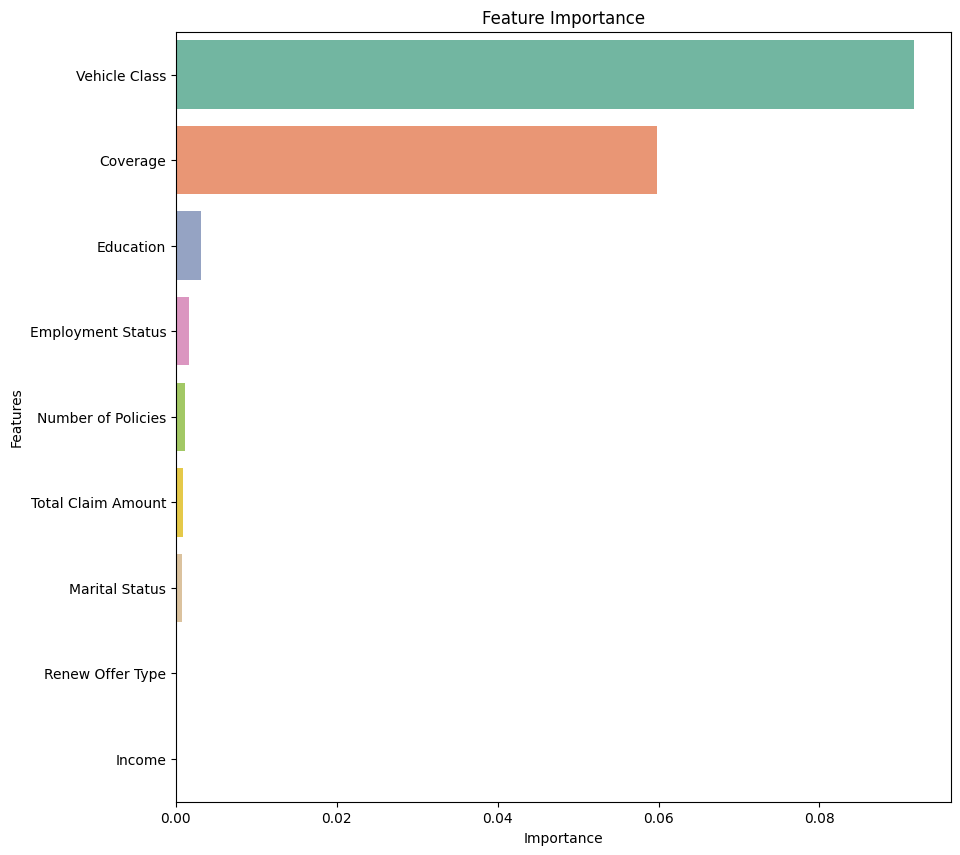

In [54]:
#Horizontal Bar Plot of Feature Importance with Seaborn
plt.figure(figsize=(10,10))
sns.barplot(x='Importance', y='Features', data=feature_importance, palette='Set2')
plt.title('Feature Importance')
plt.show()

### Residual Analysis

In [66]:
#Residual
residual = Y_test - Y_pred

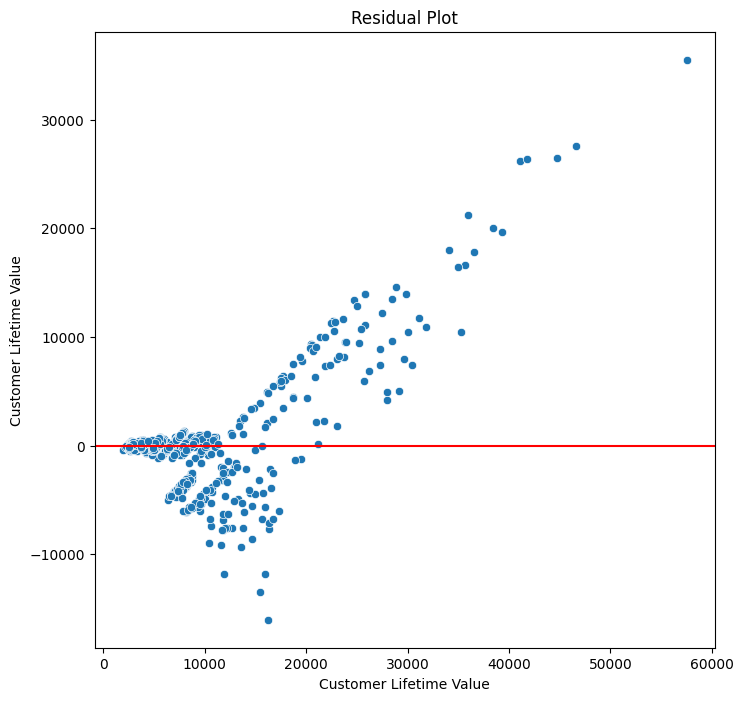

In [67]:
#See residual plot with SeaBorn
plt.figure(figsize=(8,8))
sns.scatterplot(x=Y_test, y=residual, palette='Set2')
plt.axhline(0, color='red')  # Add a horizontal line at 0
plt.title('Residual Plot')
plt.show()

In [104]:
#Plot Residual Plot
fig = go.Figure()
fig.add_trace(go.Scatter(x=Y_test, y=residual, mode='markers', marker_color='red'))
#Add a horizontal line at 0
fig.add_shape(
    type="line",
    x0=0,
    x1=max(Y_test),
    y0=0,
    y1=0,
    line=dict(
        color="blue",
        width=2,
    )
)
fig.update_layout(title='Residual Plot', xaxis_title='Prediction', yaxis_title='Residual')
fig.update_layout(width=800, height=800)
fig.show()

In [ ]:
#Dataframe of Prediction and Actual Value
result = pd.DataFrame(X_test)
result['Actual Value'] = Y_test
result['Prediction'] = Y_pred
result['Residual'] = residual
result['Percentage Error'] = round(np.abs(residual/Y_test)*100, 2)
result.reset_index(drop=True, inplace=True)

In [ ]:
#Show Outside Residual
residual_outside = result[(result['Residual'] < -12000) | (result['Prediction'] > 36500)]
display(residual_outside, residual_outside.describe(), residual_outside.describe(include='object'))

Vehicle Class  Coverage Renew Offer Type Employment Status  \
228            SUV     Basic           Offer2     Medical Leave   
245            SUV  Extended           Offer1          Employed   
247   Two-Door Car   Premium           Offer1          Employed   
406  Four-Door Car   Premium           Offer1          Employed   
545  Four-Door Car   Premium           Offer1          Employed   

    Marital Status             Education  Number of Policies  \
228        Married               College                 2.0   
245         Single               College                 2.0   
247        Married              Bachelor                 2.0   
406        Married  High School or Below                 2.0   
545         Single  High School or Below                 2.0   

     Total Claim Amount   Income  Actual Value    Prediction      Residual  \
228         1177.323534  16266.0   11513.35549  25600.729488 -14087.373998   
245          339.000467  67060.0   13623.62257  29035.656817 -15412.034247   
247          566.472247  48767.0   12887.43165  27199.969919 -14312.538269   
406          565.837664  26312.0   13024.22378  28904.572853 -15880.349073   
545          556.800000  59207.0   13770.97618  32158.071116 -18387.094936   

     Percentage Error  
228            122.36  
245            113.13  
247            111.06  
406            121.93  
545            133.52

Number of Policies  Total Claim Amount        Income  Actual Value  \
count                 5.0            5.000000      5.000000      5.000000   
mean                  2.0          641.086782  43522.400000  12963.921934   
std                   0.0          315.095230  21602.316596    894.451168   
min                   2.0          339.000467  16266.000000  11513.355490   
25%                   2.0          556.800000  26312.000000  12887.431650   
50%                   2.0          565.837664  48767.000000  13024.223780   
75%                   2.0          566.472247  59207.000000  13623.622570   
max                   2.0         1177.323534  67060.000000  13770.976180   

         Prediction      Residual  Percentage Error  
count      5.000000      5.000000          5.000000  
mean   28579.800039 -15615.878105        120.400000  
std     2444.181826   1719.459179          8.921959  
min    25600.729488 -18387.094936        111.060000  
25%    27199.969919 -15880.349073        113.130000  
50%    28904.572853 -15412.034247        121.930000  
75%    29035.656817 -14312.538269        122.360000  
max    32158.071116 -14087.373998        133.520000

Vehicle Class Coverage Renew Offer Type Employment Status  \
count              5        5                5                 5   
unique             3        3                2                 2   
top              SUV  Premium           Offer1          Employed   
freq               2        3                4                 4   

       Marital Status Education  
count               5         5  
unique              2         3  
top           Married   College  
freq                3         2

Type here

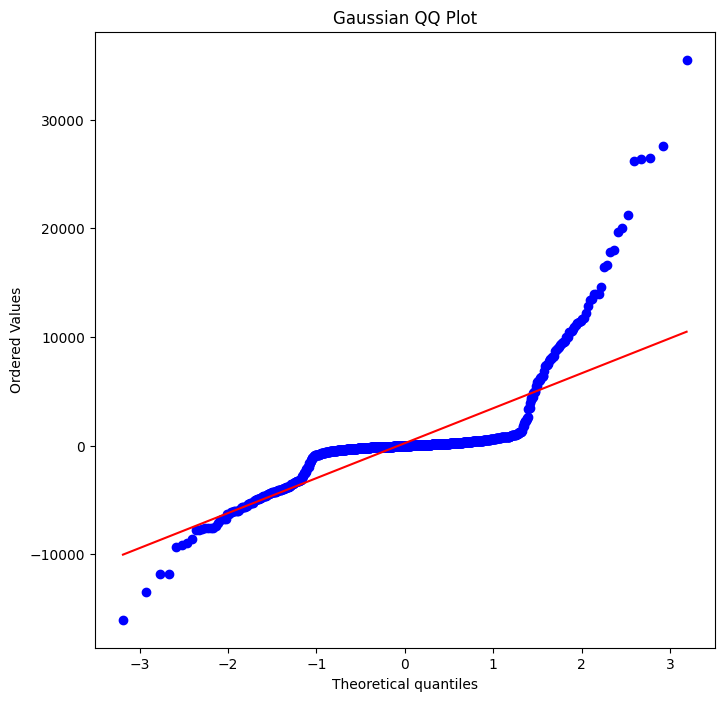

In [68]:
import scipy.stats as stats

#Gaussian QQ Plot
plt.figure(figsize=(8,8))
stats.probplot(residual, plot=plt)
plt.title('Gaussian QQ Plot')
plt.show()

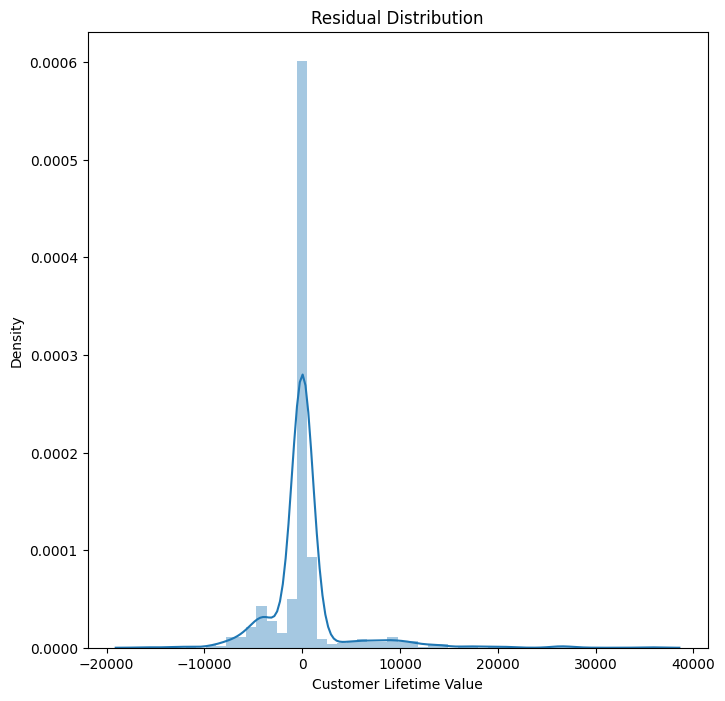

In [69]:
#Gaussian Distribution
plt.figure(figsize=(8,8))
sns.distplot(residual)
plt.title('Residual Distribution')
plt.show()